# Lab 3: Bayes Classifier and Boosting

## Jupyter notebooks

In this lab, you can use Jupyter <https://jupyter.org/> to get a nice layout of your code and plots in one document. However, you may also use Python as usual, without Jupyter.

If you have Python and pip, you can install Jupyter with `sudo pip install jupyter`. Otherwise you can follow the instruction on <http://jupyter.readthedocs.org/en/latest/install.html>.

And that is everything you need! Now use a terminal to go into the folder with the provided lab files. Then run `jupyter notebook` to start a session in that folder. Click `lab3.ipynb` in the browser window that appeared to start this very notebook. You should click on the cells in order and either press `ctrl+enter` or `run cell` in the toolbar above to evaluate all the expressions.

Be sure to put `%matplotlib inline` at the top of every code cell where you call plotting functions to get the resulting plots inside the document.

## Import the libraries

In Jupyter, select the cell below and press `ctrl + enter` to import the needed libraries.
Check out `labfuns.py` if you are interested in the details.

In [158]:
import numpy as np
from scipy import misc
from imp import reload
from labfuns import *
import random

## Bayes classifier functions to implement

The lab descriptions state what each function should do.

In [171]:
# NOTE: you do not need to handle the W argument for this part!
# in: labels - N vector of class labels
# out: prior - C x 1 vector of class priors
def computePrior(labels, W):
    Npts = labels.shape[0]
    if W is None:
        W = np.ones((Npts,1))/Npts
    else:
        assert(W.shape[0] == Npts)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    prior = np.zeros((Nclasses,1))

    # TODO: compute the values of prior for each class!
    # ==========================
    for jdx,classNo in enumerate(classes):
        idx = np.where(labels==classNo)[0]
        size=np.sum(W[idx],axis=0)
        prior[classNo]=float(size)
        
#TODO: prior[classNo]=float(size)/float(Npts)
        #print "W[idx] :"+str(W[idx])
        #print "num-" + str(float(size)) + ",N-"+str(float(Npts)),
    #print ""
    #print "prior" + str(prior)
    # ==========================
    return prior

# NOTE: you do not need to handle the W argument for this part!
# in:      X - N x d matrix of N data points
#     labels - N vector of class labels
# out:    mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
def mlParams(X, labels, W):
    assert(X.shape[0]==labels.shape[0])
    Npts,Ndims = np.shape(X)
    classes = np.unique(labels)
    Nclasses = np.size(classes)

    if W is None:
        W = np.ones((Npts,1))/float(Npts)

    mu = np.zeros((Nclasses,Ndims))
    sigma = np.zeros((Nclasses,Ndims,Ndims))

    # TODO: fill in the code to compute mu and sigma!
    # ============MU============
    for jdx,classNo in enumerate(classes):
        idx = np.where(labels==classNo)[0]   
        prod=W[idx]*X[idx]
        numerator=np.sum(prod,axis=0)
        denom=np.sum(W[idx],axis=0)
        mu[classNo]=numerator/denom
        #print W[idx]
        #print np.shape(W[idx])
        #print "Nk"+str(size) +",Mu numerator-"+str(sum)
    #print np.shape(mu)
    # ==========================
    # ===========Sigma==========
    for jdx,classNo in enumerate(classes):
        idx = np.where(labels==classNo)[0]
        denom=np.sum(W[idx],axis=0)
        sumOfProd=np.zeros((Ndims,Ndims))
        for index in idx:
            prod=W[index]*(np.square(X[index]-mu[classNo]))
            sumOfProd=np.add(sumOfProd,prod)
        sigma[classNo]=sumOfProd/denom  
        sigma[classNo]=np.diag(np.diag(sigma[classNo]))


        #print "Nk-"+str(size)+", prod-"+str(prod)+", prod shape-"+str(np.shape(prod))
        #print "sumOfProf-"+str(sumOfProd)+", sumofProd size-"+str(np.shape(sumOfProd))     
    #print np.shape(sigma)
    # ==========================

    return mu, sigma

# in:      X - N x d matrix of M data points
#      prior - C x 1 matrix of class priors
#         mu - C x d matrix of class means (mu[i] - class i mean)
#      sigma - C x d x d matrix of class covariances (sigma[i] - class i sigma)
# out:     h - N vector of class predictions for test points
def classifyBayes(X, prior, mu, sigma):

    Npts = X.shape[0]
    Nclasses,Ndims = np.shape(mu)
    logProb = np.zeros((Nclasses, Npts))

    # TODO: fill in the code to compute the log posterior logProb!
    # ==========================
    for iP,dims in enumerate(X):
        for iC in range(Nclasses):
            a1=np.log(np.linalg.det(sigma[iC]))
            a2=np.matmul(np.matmul((X[iP]-mu[iC]),sigma[iC]),np.transpose(X[iP]-mu[iC]))
            a3= np.log(prior[iC])             
            #a3=a3[0]
            c=(-1*0.5*a1)+(-1*0.5*a2)+(a3)
            logProb[iC,iP]=c
    # ==========================
    
    # one possible way of finding max a-posteriori once
    # you have computed the log posterior
    h = np.argmax(logProb,axis=0)
    return h

The implemented functions can now be summarized into the `BayesClassifier` class, which we will use later to test the classifier, no need to add anything else here:

In [172]:
# NOTE: no need to touch this
class BayesClassifier(object):
    def __init__(self):
        self.trained = False

    def trainClassifier(self, X, labels, W=None):
        rtn = BayesClassifier()
        rtn.prior = computePrior(labels, W)
        rtn.mu, rtn.sigma = mlParams(X, labels, W)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBayes(X, self.prior, self.mu, self.sigma)

## Test the Maximum Likelihood estimates

Call `genBlobs` and `plotGaussian` to verify your estimates.

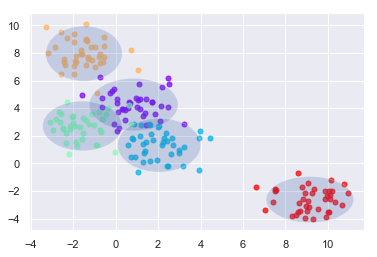

In [173]:
%matplotlib inline

X, labels = genBlobs(centers=5)
mu, sigma = mlParams(X,labels,None)
plotGaussian(X,labels,mu,sigma)

Call the `testClassifier` and `plotBoundary` functions for this part.

In [174]:
testClassifier(BayesClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 33.3
Trial: 10 Accuracy 33.3
Trial: 20 Accuracy 33.3
Trial: 30 Accuracy 33.3
Trial: 40 Accuracy 33.3
Trial: 50 Accuracy 33.3
Trial: 60 Accuracy 33.3
Trial: 70 Accuracy 33.3
Trial: 80 Accuracy 33.3
Trial: 90 Accuracy 33.3
Final mean classification accuracy  33.3 with standard deviation 0


In [175]:
testClassifier(BayesClassifier(), dataset='vowel', split=0.7)

Trial: 0 Accuracy 9.74
Trial: 10 Accuracy 9.09
Trial: 20 Accuracy 9.09
Trial: 30 Accuracy 9.09
Trial: 40 Accuracy 9.09
Trial: 50 Accuracy 9.09
Trial: 60 Accuracy 9.09
Trial: 70 Accuracy 9.09
Trial: 80 Accuracy 9.09
Trial: 90 Accuracy 9.09
Final mean classification accuracy  9.27 with standard deviation 0.63


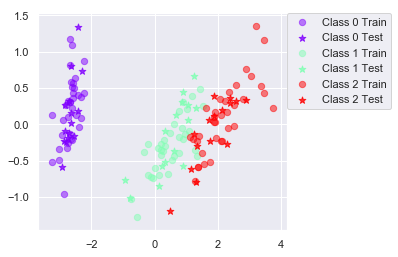

In [176]:
%matplotlib inline
plotBoundary(BayesClassifier(), dataset='iris',split=0.7)

## Boosting functions to implement

The lab descriptions state what each function should do.

In [177]:
# in: base_classifier - a classifier of the type that we will boost, e.g. BayesClassifier
#                   X - N x d matrix of N data points
#              labels - N vector of class labels
#                   T - number of boosting iterations
# out:    classifiers - (maximum) length T Python list of trained classifiers
#              alphas - (maximum) length T Python list of vote weights
def trainBoost(base_classifier, X, labels, T=10):
    # these will come in handy later on
    Npts,Ndims = np.shape(X)

    classifiers = [] # append new classifiers to this list
    alphas = [] # append the vote weight of the classifiers to this list
    
    # The weights for the first iteration
    wCur = np.ones((Npts,1))/float(Npts)
    
    for i_iter in range(0, T):
        # a new classifier can be trained like this, given the current weights
        classifiers.append(base_classifier.trainClassifier(X, labels, wCur))
        # do classification for each point
        vote = classifiers[-1].classify(X)
        # TODO: Fill in the rest, construct the alphas etc.
        # ==========================
        error=0
        for i in range(Npts):
            correctPred=0
            if vote[i]==labels[i]:
                correctPred=1
            error+= wCur[i]*(1-correctPred)
        
        #print "at ckpt1 wCur Shape-"+str(np.shape(wCur))
        
        alpha=0.5*(np.log(1-error)-np.log(error))      
        alphas.append(alpha) # you will need to append the new alpha
        if correctPred==1:
            wNew=wCur*np.exp(-1*alpha)
            
            #print "at ckpt2 wCur Shape-"+str(np.shape(wCur))
            #print "wNew shape :"+str(np.shape(wCur))

        else:
            wNew=wCur*np.exp(alpha)
            #print "at ckpt3 wCur Shape-"+str(np.shape(wCur))
        #wCur=np.linalg.norm(wNew)
        sum=np.sum(wNew)
        wCur=wNew/sum
        #print "at ckpt4 wCur Shape-"+str(np.shape(wCur))
        # ==========================
        
    return classifiers, alphas

# in:       X - N x d matrix of N data points
# classifiers - (maximum) length T Python list of trained classifiers as above
#      alphas - (maximum) length T Python list of vote weights
#    Nclasses - the number of different classes
# out:  yPred - N vector of class predictions for test points
def classifyBoost(X, classifiers, alphas, Nclasses):
    Npts = X.shape[0]
    Ncomps = len(classifiers)
#     print "points "+str(Npts)
#     print "classifiers shape "+str(np.shape(classifiers))
#     print "alphas shape "+str(np.shape(alphas))
#     # if we only have one classifier, we may just classify directly
    if Ncomps == 1:
        return classifiers[0].classify(X)
    else:
        votes = np.zeros((Npts,Nclasses))

        # TODO: implement classificiation when we have trained several classifiers!
        # here we can do it by filling in the votes vector with weighted votes
        # ==========================
        for j in range(Ncomps):
            vote=classifiers[j].classify(X)
            print vote
            for i in range(Npts):
                votes[i][vote[i]]+=alphas[j]
            
        # ==========================

        # one way to compute yPred after accumulating the votes
        return np.argmax(votes,axis=1)

The implemented functions can now be summarized another classifer, the `BoostClassifier` class. This class enables boosting different types of classifiers by initializing it with the `base_classifier` argument. No need to add anything here.

In [178]:
# NOTE: no need to touch this
class BoostClassifier(object):
    def __init__(self, base_classifier, T=10):
        self.base_classifier = base_classifier
        self.T = T
        self.trained = False

    def trainClassifier(self, X, labels):
        rtn = BoostClassifier(self.base_classifier, self.T)
        rtn.nbr_classes = np.size(np.unique(labels))
        rtn.classifiers, rtn.alphas = trainBoost(self.base_classifier, X, labels, self.T)
        rtn.trained = True
        return rtn

    def classify(self, X):
        return classifyBoost(X, self.classifiers, self.alphas, self.nbr_classes)

## Run some experiments

Call the `testClassifier` and `plotBoundary` functions for this part.

In [179]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='iris',split=0.7)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 0 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 10 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 20 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 30 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 40 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Trial: 50 Accuracy 33.3
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]
Final mean classification accuracy  33.3 with standard deviation 0


In [180]:
testClassifier(BoostClassifier(BayesClassifier(), T=10), dataset='vowel',split=0.7)

[3 5 3 5 3 3 5 3 5 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 4 3 4 4 4 4 4 4 4 4 4 3 4
 5 3 3 4 4 3 4 3 3 4 3 3 5 4 3 3 3 4 4 3 4 4 4 3 3 5 4 4 5 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 5 3 3 5 3 5 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 4 3 4 4 4 4 4 4 4 4 4 3 4
 5 3 3 4 4 3 4 3 3 4 3 3 5 4 3 3 3 4 4 3 4 4 4 3 3 5 4 4 5 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 5 3 3 5 3 5 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 3 3 3 4 3 4 4 4 4 4 4 4 4 4 3 4
 5 3 3 4 4 3 4 3 3 4 3 3 5 4 3 3 3 4 4 3 4 4 4 3 3 5 4 4 5 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 5 3 3 5 3 5 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 4 5 3 3 5 5 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 5 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 4 4 4 4 3 3 4 4 4 3 4 3 3
 3 5 4 4 3 4 4 4 5 3 4 3 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 5 4 5 3 3 3 3 5 3 3
 3 3 3 3 3 3]
[ 3  3  3  3 10 10 10  3 10  3 10  3  3 10  3  5  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  5  3  5  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  4  4  4 10  3  3  3  3  3  4 10 10  4  3  3 10  3  3 10  4 10
  3 10  4  3 10 10 10 10 10  3  3 10 10  3  3 10 10 10  3 10  3  3  3  3
 10  3  3  3  3  3  3  3  3  3]
[ 3  3  3  3 10 10 10  3 10  3 10  3  3 10  3  5  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  5  3  5  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 4 3 3 4
 3 3 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 4 3 3 4
 3 3 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 3 3 4 3 3 4
 3 3 3 3 3 3 4 3 4 3 4 3 3 3 3 3 3 3 4 4 4 3 3 3 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 5 3 5 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 4
 3 3 3 3 3 4 3 3 3 3 3 3 3 4 3 3 4 4 4 4 3 4 4 3 3 3 3 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3 4 3 4 4 4 4 4
 3 3 3 4 4 4 4 3 4 4 3 4 4 3 4 4 4 4 3 4 4 3 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3 4 3 4 4 4 4 4
 3 3 3 4 4 4 4 3 4 4 3 4 4 3 4 4 4 4 3 4 4 3 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3 3 3 3 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4
 4 4 3 4 4 4 4 4 4 4 3 4 4 3 3 4 3 4 3 4 4 4 4 3 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 4 3 3 3 3]
[3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3 3 3 3 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4
 4 4 3 4 4 4 4 4 4 4 3 4 4 3 3 4 3 4 3 4 4 4 4 3 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 4 3 3 3 3]
[3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 3 3 3 3 3 3 4 3 4 4 4 3 4 4 4 4 4 4 4 4 3 4 4
 4 4 3 4 4 4 4 4 4 4 3 4 4 3 3 4 3 4 3 4 4 4 4 3 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 4 3 3 3 3]
[3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 3 3 3 3 3

[5 5 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 4 3 4 3 4 4 4 4 3 4 3
 3 3 3 4 3 4 3 3 3 3 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[5 5 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 4 3 4 3 4 4 4 4 3 4 3
 3 3 3 4 3 4 3 3 3 3 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[5 5 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 4 3 4 3 4 4 4 4 3 4 3
 3 3 3 4 3 4 3 3 3 3 4 3 4 3 4 3 4 4 3 3 4 4 4 4 4 3 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[5 5 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 5 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 4 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 4 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 4 4 3 4 3 3 3 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 5 5 5 3 3 5 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 3 3 5 3 3 5 3 3
 3 3 5 3 5 3]
[3 3 5 5 5 3 3 5 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 3 3 5 3 3 5 3 3
 3 3 5 3 5 3]
[3 3 5 5 5 3 3 5 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 5 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 3 5 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 4 5 5 5 5 5 5 4 5 5 5 5 5 5 3 3 5 3 3 5 3 3
 3 3 5 3 5 3]
[3 3 5 5 5 3 3 5 3 5 3 3 3 5 3 3 3 3 3 3 3 3 3 5 5 3 3 3 3

[3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 4 3 4 4 4 4 4 4 3
 4 3 4 4 3 4 3 3 4 3 3 4 3 3 3 4 4 4 3 3 4 3 4 4 3 4 4 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 4 3 4 4 4 4 4 4 3
 4 3 4 4 3 4 3 3 4 3 3 4 3 3 3 4 4 4 3 3 4 3 4 4 3 4 4 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 4 3 4 4 4 4 4 4 3
 4 3 4 4 3 4 3 3 4 3 3 4 3 3 3 4 4 4 3 3 4 3 4 4 3 4 4 4 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 4 4 4 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 3 4 4 4 3 3 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 3 4 3 3 4 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 4 4 4 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 3 4 4 4 3 3 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 3 4 3 3 4 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 4 4 4 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 4 3 4 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 3 4 4 4 3 3 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 3 4 3 3 4 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 4 4 4 3 3 3 4 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 4 4 3 4 4 4 3 4 3 3 3 3 4 3 4 3
 4 3 3 3 3 3 3 4 4 3 4 4 3 4 3 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4
 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 3 3 3
 3 4 3 3 4 3]
[4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 4 4 3 4 4 4 3 4 3 3 3 3 4 3 4 3
 4 3 3 3 3 3 3 4 4 3 4 4 3 4 3 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4
 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 3 3 3
 3 4 3 3 4 3]
[4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 4 4 3 4 4 4 3 4 3 3 3 3 4 3 4 3
 4 3 3 3 3 3 3 4 4 3 4 4 3 4 3 3 4 3 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4
 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 4 4 3 3 3
 3 4 3 3 4 3]
[4 4 4 3 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3 3 4 3 3 4 3 3 3 3

[3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 4 3 3 4 4 4
 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 3 3 3 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 4 3 3 4 4 4
 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 3 3 3 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 4 3 3 4 4 4
 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 4 4 3 3 3 4 4 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 5 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 5 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 5 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 5 4 4 3 3 5 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 5 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 5 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 5 4 4 3 3 5 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 5 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 5 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 4 3 3 3 5 4 4 3 3 5 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 5 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[ 3  3  3  3  3  3  3  3 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  4  3  3  3  3  3  4  4  3  4  4  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[ 3  3  3  3  3  3  3  3 10  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  4  3  3  3  3  3  4  4  3  4  4  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[ 3  3  3  3  3  3  3  3 10  3  3  3  3  3  3  3  3  3  3  3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 4 4 3
 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 4 4 3
 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 4 3 3 4 4 3
 3 3 3 4 3 4 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[ 3  3  3  3  3  3  3  3  3  3  3  3  3 10  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3 10 10 10  3  3 10  3 10 10 10  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[ 3  3  3  3  3  3  3  3  3  3  3  3  3 10  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3 10 10 10  3  3 10  3 10 10 10  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[ 3  3  3  3  3  3  3  3  3  3  3  3  3 10  3  3  3  3  3  3

[3 5 3 3 5 3 3 3 3 5 5 3 3 3 5 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 5 3 5 3 3 3
 3 3 3 5 3 3 3 5 3 3 5 3 3 5 5 3 3 3 3 3 5 5 3 3 5 3 3 3 5 3 3 3 5 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 3 3 5 5 3 3 3 5 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 5 3 5 3 3 3
 3 3 3 5 3 3 3 5 3 3 5 3 3 5 5 3 3 3 3 3 5 5 3 3 5 3 3 3 5 3 3 3 5 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 3 3 5 5 3 3 3 5 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 5 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 5 3 3 5 3 5 3 3 3
 3 3 3 5 3 3 3 5 3 3 5 3 3 5 5 3 3 3 3 3 5 5 3 3 5 3 3 3 5 3 3 3 5 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 3 3 5 5 3 3 3 5 3 3 3 3 3 3 3 5 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 4 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 4 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 4 3 3 4 3 3 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 4 3 3 3 4 3 4 4 4
 4 3 3 4 4 4 3 3 4 3 4 4 3 3 3 4 4 4 4 3 4 4 5 4 4 4 4 4 4 3 3 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 4 3 3 3 4 3 4 4 4
 4 3 3 4 4 4 3 3 4 3 4 4 3 3 3 4 4 4 4 3 4 4 5 4 4 4 4 4 4 3 3 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3
 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 4 3 3 3 4 3 4 4 4
 4 3 3 4 4 4 3 3 4 3 4 4 3 3 3 4 4 4 4 3 4 4 5 4 4 4 4 4 4 3 3 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[10  3  3  3  3  3  3  3  3  3 10 10  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  5  5  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3 10  3 10  3  3  3  3  3  3  3  3 10  3 10  3  3  3  5
  3  3  3  3 10  3 10 10 10  3  3 10  3  3 10 10 10 10 10  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[10  3  3  3  3  3  3  3  3  3 10 10  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  5  5  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3 10  3 10  3  3  3  3  3  3  3  3 10  3 10  3  3  3  5
  3  3  3  3 10  3 10 10 10  3  3 10  3  3 10 10 10 10 10  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3]
[10  3  3  3  3  3  3  3  3  3 10 10  3  3  3  3  3  3  3  3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 4 3 3 4 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 4 3 3 4 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 3 4 3 3 4 3 3 4 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 5 3 3 3 3 5 3 5 3 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3
 3 4 4 3 3 3 3 4 4 3 3 3 4 4 3 4 4 3 4 3 4 3 4 4 4 3 3 5 3 3 5 3 3 3 3 3 3
 3 5 3 3 3 3]
[3 3 3 5 3 3 3 3 5 3 5 3 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3
 3 4 4 3 3 3 3 4 4 3 3 3 4 4 3 4 4 3 4 3 4 3 4 4 4 3 3 5 3 3 5 3 3 3 3 3 3
 3 5 3 3 3 3]
[3 3 3 5 3 3 3 3 5 3 5 3 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 3
 3 4 4 3 3 3 3 4 4 3 3 3 4 4 3 4 4 3 4 3 4 3 4 4 4 3 3 5 3 3 5 3 3 3 3 3 3
 3 5 3 3 3 3]
[3 3 3 5 3 3 3 3 5 3 5 3 3 3 3 5 3 3 5 3 5 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 3 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 3 4 4 3 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 3 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 3 4 4 3 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 3 4 3 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 3 4 3 4 4 3 4 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 3 3 3 3 4 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 4 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3
 4 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 3 4 3 4 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3
 4 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 3 4 3 4 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 3
 4 3 3 3 3 3 3 4 3 3 3 3 4 3 3 3 4 4 3 4 3 4 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 5 3 3 5 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 5
 5 3 3 3 3 3 5 3 3 3 3 4 4 5 4 3 4 4 3 4 3 3 4 5 4 4 4 4 4 4 4 4 4 3 4 4 3
 4 4 5 5 3 5 3 4 3 4 4 3 5 3 4 5 4 5 4 4 4 4 4 4 5 4 5 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 5
 5 3 3 3 3 3 5 3 3 3 3 4 4 5 4 3 4 4 3 4 3 3 4 5 4 4 4 4 4 4 4 4 4 3 4 4 3
 4 4 5 5 3 5 3 4 3 4 4 3 5 3 4 5 4 5 4 4 4 4 4 4 5 4 5 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 5 3 3 3 3 3
 3 3 3 3 3 5 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 5 3 3 5
 5 3 3 3 3 3 5 3 3 3 3 4 4 5 4 3 4 4 3 4 3 3 4 5 4 4 4 4 4 4 4 4 4 3 4 4 3
 4 4 5 5 3 5 3 4 3 4 4 3 5 3 4 5 4 5 4 4 4 4 4 4 5 4 5 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 5 3 3 5 3 3 5 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 4 4 4 4 3
 3 3 3 3 3 3 4 3 4 4 4 4 3 3 3 4 3 4 4 3 3 4 3 4 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 4 4 4 4 3
 3 3 3 3 3 3 4 3 4 4 4 4 3 3 3 4 3 4 4 3 3 4 3 4 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 3 4 4 4 4 3
 3 3 3 3 3 3 4 3 4 4 4 4 3 3 3 4 3 4 4 3 3 4 3 4 4 4 4 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 5 4 3 4 4 3 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 5 4 3 4 4 3 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 5 4 3 4 4 3 4 3 3 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[3 5 5 3 3 3 5 3 3 5 3 3 5 3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 5 3 3 5 5 5 5 4 4 4 4 5 5 3 5 5 5
 5 5 5 3 5 4 3 5 5 3 4 5 5 3 5 5 3 5 5 4 4 5 4 5 5 5 4 4 5 3 3 3 3 5 3 3 3
 3 3 3 3 3 3]
[3 5 5 3 3 3 5 3 3 5 3 3 5 3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 5 3 3 5 5 5 5 4 4 4 4 5 5 3 5 5 5
 5 5 5 3 5 4 3 5 5 3 4 5 5 3 5 5 3 5 5 4 4 5 4 5 5 5 4 4 5 3 3 3 3 5 3 3 3
 3 3 3 3 3 3]
[3 5 5 3 3 3 5 3 3 5 3 3 5 3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 5 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3
 3 3 3 3 3 3 3 3 5 3 3 3 3 5 3 3 3 3 3 3 5 3 3 5 5 5 5 4 4 4 4 5 5 3 5 5 5
 5 5 5 3 5 4 3 5 5 3 4 5 5 3 5 5 3 5 5 4 4 5 4 5 5 5 4 4 5 3 3 3 3 5 3 3 3
 3 3 3 3 3 3]
[3 5 5 3 3 3 5 3 3 5 3 3 5 3 3 3 5 3 3 3 3 3 5 3 3 3 3 3 3

[4 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 3 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[4 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 3 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[4 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 3 3 4 4 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3]
[4 3 3 3 3 3 3 3 3 3 3 3 5 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


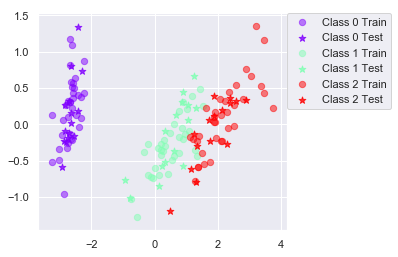

In [182]:
%matplotlib inline
plotBoundary(BoostClassifier(BayesClassifier()), dataset='iris',split=0.7)

Now repeat the steps with a decision tree classifier.

In [183]:
testClassifier(DecisionTreeClassifier(), dataset='iris', split=0.7)

Trial: 0 Accuracy 95.6
Trial: 10 Accuracy 100
Trial: 20 Accuracy 91.1
Trial: 30 Accuracy 91.1
Trial: 40 Accuracy 93.3
Trial: 50 Accuracy 91.1
Trial: 60 Accuracy 88.9
Trial: 70 Accuracy 88.9
Trial: 80 Accuracy 93.3
Trial: 90 Accuracy 88.9
Final mean classification accuracy  92.4 with standard deviation 3.71


In [184]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
Trial: 0 Accuracy 95.6
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 2 1 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2 2 2 2 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2
 1 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 2 2 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 2 2 2 2
 1 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 2

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1
 1 2 2 2 1 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 1
 1 2 2 2 1 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 1 2
 2 2 2 2 2 2 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2

 2 1 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1 2 1 1 1 2 1 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 2 2 2 2 1

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 2 1 2 2

In [185]:
testClassifier(DecisionTreeClassifier(), dataset='vowel',split=0.7)

Trial: 0 Accuracy 63.6
Trial: 10 Accuracy 68.8
Trial: 20 Accuracy 63.6
Trial: 30 Accuracy 66.9
Trial: 40 Accuracy 59.7
Trial: 50 Accuracy 63
Trial: 60 Accuracy 59.7
Trial: 70 Accuracy 68.8
Trial: 80 Accuracy 59.7
Trial: 90 Accuracy 68.2
Final mean classification accuracy  64.1 with standard deviation 4


In [186]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='vowel',split=0.7)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  0  1  1  1  1
  1  1  1  1  2  2  2  2  2  1  2  2  2  2  2  2  2  2  3  3  2  3  3  8
  2  8  5 10  3  2  3  3  2  5  2  4  5  2  4  4  5  4  4  4  5  6  5  5
  2  5  5  4  5  5  2  2  2 10  8 10  6  5  6  8  5  7  7  7  6  6  4  6
  8  7  7  6  7  7  7  7  7  7  8  7  8  7  7  8  8  8  8  9  8  8  6  8
  8  8  8  8  8  8  8  8  9  9  8  9  9  9  8  8  8  9  8  9 10  2 10 10
 10  5  5 10  2  2  2  2  2  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  0  1  1  1  1
  1  1  1  1  2  2  2  2  2  1  2  2  2  2  2  2  2  2  3  3  2  3  3  8
  2  8  5 10  3  2  3  3  2  5  2  4  5  2  4  4  5  4  4  4  5  6  5  5
  2  5  5  4  5  5  2  2  2 10  8 10  6  5  6  8  5  7  7  7  6  6  4  6
  8  7  7  6  7  7  7  7  7  7  8  7  8  7  7  8  8  8  9  9  8  8  6  8
  8  8  8  8  8  8  8  8  9  9  8  9  9  9  8  8  8  9  8  9 10  2 10 10
 10  5  5 10  2  2  2  2  2  2]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  9  1  1  1  1  1  1
  1  1  2  1  2  2  2  1  1  2  2  2  2  2  2  2  2  1  3  9  3  6  3  3
  5  3  3  3 10  3  9  3  4  8 10  4  4  4  4  4  4 10  4  4 10  4  4  3
 10  5 10  9 10  3  3 10  9 10 10  4  4  8  6  7  6  2  2  6  8  6  8  5
  6  2  7  6  6  7  8  8  7  7  6  7  8  7  8  8  8  9  9  2  7  9  8  8
  9  8  8  8  6  7  9  9  9  9  9  9  9  9  9  1  1  9  9  9 10 10  1 10
 10 10 10 10  2 10 10  2 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  9  1  1  2  2  1  2
  1  1  2  1  2  2  2  1  1  2  2  2  2  2  2  2  2  1  3  9  3  6  3  3
  5  3  3  3 10  3  9  3  4  8 10  4  4  4  4  4  4 10  4  4 10  4  4  3
 10  5 10  9 10  3  3 10  9 10 10  4  4  8  6  7  6  2  2  6  8  6  8  5
  6  2  7  6  6  7  8  8  7  7  6  7  8  7  8  8  8  9  9  2  7  9  8  8
  9  8  8  6  6  7  9  9  9  9  9  9  9  9  9  1  1  9  9  9 10 10  1 10
 10 10 10 10  2 10 10  2 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  9  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  1  1  0  1
  0  1  1  1  1  2  1  1  2  5  1  2  2  5  5  8  2  1  3  3  3  5  3  5
  1  3  5  4  3  3  3  3  4  4  4  5  6  5  4  1  5  5  5  5  5  5  5  1
  4 10  5  5  5  5  5  5  1  1  3  5  7  6  6  7  6  6  7  4  6  7  5  6
  6  7  7  6  8  8  7  7  6  7  6  6  8  8  7  7  8  1  8  8  8  8  8  8
  8  8  8  8  8  8  9  8  8  8  9  9  8  9  9  9  8  9  1  8  8 10  5  8
  1 10  5  5 10 10 10  3 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  1  1  9  1
  0  1  1  1  1  2  1  1  2  5  1  2  2  5  5  8  2  1  3  3  3  5  3  5
  1  3  5  4  3  3  3  3  4  4  4  5  6  5  4  1  5  5  5  5  5  5  5  1
  4 10  5  5  5  5  5  5  1  1  3  5  7  6  6  7  6  6  7  4  6  7  5  6
  6  7  7  6  8  8  7  7  6  7  6  6  8  8  7  7  8  1  8  8  8  8  8  8
  8  8  8  8  8  8  9  8  8  8  9  9  8  9  9  9  8  9  1  8  8 10  5  8
  1 10  5  5 10 10 10  3 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  1  1  1  2  2  2
  1  1  1  2  2  2  2  2  2  2  2  2  2  1  1  2  2  2  6  3  3  3  3  3
  8  6  8  3  8  3  3  3  4  4  4  5  4  4  5  5  4  4  5  5  4  4 10 10
  4  4  5  5  5  5  5 10  5  4  5 10  5  7  4  7  4  8  8  5  6  4  7  8
  8  7  7  7  7  7  7  8  7  7  7  8  7  7  7  7  9  8  8  6  2  8  7  8
  8  7  8  8  8  8  8  9  7  8  8  9  8  8  9  8  5  8  9  9 10  2 10 10
 10  5  4 10 10 10  5  2 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  2  2  2
  1  1  1  2  2  2  2  2  2  2  2  2  5  2  1  2  2  2  6  3  3  3  3  3
  8  6  8  3  8  3  3  3  4  4  4  5  4  4  5  5  4  4  5  5  4  4 10 10
  4  4  5  5  5  5  5 10  5  4  5 10  5  7  4  7  4  8  8  5  6  4  7  8
  8  7  7  7  7  7  7  8  7  7  7  8  7  7  7  7  9  8  8  6  2  8  7  8
  8  7  8  8  8  8  8  9  7  8  8  9  8  8  9  8  5  8  9  9 10  2 10 10
 10  5  4 10 10 10  5  2 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  2  1  1  2  1  2  1  1  1  0
  1  2  1  1  2  2  2  2  2  2  2  2  2 10  2 10  2  2  6  3  8  3  8  3
  3  3  3 10  5  3  3  3  4 10  4 10  4  4  4  4  4 10  4 10  5  4  5 10
 10  5 10  5 10 10 10  5 10 10 10 10  8 10  5  5  8  4  8  6  6  5  4  6
  7 10  8  7  7  6  7  6  7  7  7  7  6  7  8  6  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  9  8  8  8  9  8  8  9  8  8  8  9  9 10 10 10 10
 10 10 10 10 10 10 10 10 10 10]
[ 0  9  0  0  0  0  0  9  1  0  0  0  0  0  2  1  1  2  1  2  1  1  1  0
  1  2  1  1  2  2  2  2  2  2  2  2  2 10  2 10  2  2  6  3  8  3  8  3
  3  3  3 10  3  3  3  3  4 10  4 10  4  4  4  4  4 10  4 10  5  4  5 10
 10  5 10  5 10 10 10  5 10 10 10 10  8 10  5  5  8  4  8  6  6  5  4  6
  7 10  8  7  7  6  7  6  7  7  7  7  6  7  8  6  8  8  8  8  8  8  8  8
  8  8  8  8  8  8  8  9  8  8  8  9  8  8  9  8  8  8  9  9 10 10 10 10
 10 10 10 10 10 10 10 10 10 10]
[ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  2  1  1  2  1  2

[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  1  1  9  1  1  2  2  1
  1  2  1  1  1  9  2  9  2  9  2  2  2  2  2  2  1  2  3  3  3  5  5  3
 10  5  3  5  5  5  5  3  6  4  4  5  5  4  4  5  6  4  4  4  4  4  5  5
  5  4  4  5  5 10  4  5  5  1  4  5  2  6  9  2  4  6  4  4  4  6  6  6
  4  4  7  8  7  7  7  7  7  8  8  7  8  7  8  7  9  8  9  9  9  8  8  8
  8  8  7  8  8  8  1  1  9  9  9  1  9  9  7  9  9  9  9  9 10  8 10 10
 10  4 10 10 10 10 10 10  5  5]
[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  1  1  9  1  1  2  2  1
  1  2  1  1  1  9  2  9  2  9  2  2  2  2  2  2  1  2  3  3  3  5  5  3
 10  5  3  5  5  5  5  3  6  4  4  5  5  4  4  5  6  4  4  4  4  4  5  5
  5  4  4  5  5 10  4  5  5  1  4  5  2  6  9  2  4  6  4  4  4  6  6  6
  4  4  7  8  7  7  7  7  7  8  8  7  8  7  8  7  9  8  9  9  9  8  8  8
  8  8  7  8  8  8  1  1  9  9  9  1  9  9  7  9  9  9  9  9 10  8 10 10
 10  4 10 10 10 10 10 10  5  5]
[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  1  1  1  1  9  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  1  1  2  2  2  1  1  2 10  3  3  8  3  5
  3  8  3  4  3  3 10  5  4  4  4  4  4 10  4  4 10  4  4  4  4  4  5  5
  4  5 10  4 10  4  5 10  5  6  4  4  4  8  6  2  7  7  8  4  6  6  6  6
  4  2  6  6  8  8  7  8  7  7  6  7  7  7  6  7  9  8  8  2  6  8  8  8
 10  8  8  8  9  8  9  8  9  1  8  9  1  8  8  1  8  9  8  9  5 10 10 10
 10 10 10 10  5  4  4  6 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0  1  1  1  1
  1  1  1  1  2  2  2  2  2  2  1  1  2  2  2  1  1  2 10  3  3  8  3  5
  3  8  3  4  3  3 10  5  4  4  4  4  4 10  4  4 10  4  4  4  4  4  5  5
  4  5 10  4 10  4  5 10  5  6  4  4  4  8  6  2  7  7  8  4  6  6  6  6
  4  2  6  6  8  8  7  8  7  7  6  7  7  7  6  7  9  8  8  2  6  8  8  8
 10  8  8  8  9  8  9  8  9  1  8  9  1  8  8  1  8  9  8  9  5 10 10 10
 10 10 10 10  5  4  4  6 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  5  5  1
  1  1  0  1  5  2  3  5  2 10  5  3  2  5  5  6  2  2  8  3 10 10  3  3
  3  3 10  3  3  8  8  3 10  6  4  4 10  6 10 10  6  6 10  5  6  4 10 10
 10 10 10 10  4 10  6 10 10 10 10  5  6  6  8  7  6  8  7  6  8  8  7  8
  8  8  7  7  7  7  7  8  7  7  7  7  7  7  8  7  8  8  9  8  8  8  8  8
  8  8  8  8  6  8  9  9  9  5  8  8  5  9  9  8  8  8  9  8 10 10 10 10
 10  1 10 10 10 10  1  1 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  5  5  1
  1  1  8  1  5  2  3  5  2 10  5  3  2  5  5  5  2  2  8  3 10 10  3  3
  3  3 10  3  3  8  8  3 10  6  4  4 10  6 10 10  6  6 10  5  6  4 10 10
 10 10 10 10  4 10  6 10 10 10 10  5  6  6  8  7  6  8  7  6  8  8  7  8
  8  8  7  7  7  7  7  8  7  7  7  7  7  7  8  7  8  8  9  8  8  8  8  8
  8  8  8  8  5  8  9  9  9  5  8  8  5  9  9  8  8  8  9  8 10 10 10 10
 10  1 10 10 10 10  1  1 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  5  1  1  1  2  1  1  1
  5  5  3  1  2 10  2  2  2  2 10  2 10  2  2  1  2  1 10  3  3  3  3  3
  5  5  5  3  5  3  3  3  4  4  4  5  5  4  5  4  4  5 10 10  4  4  5  5
 10  5 10 10  4 10  3 10  2  4  5 10  3  6  6  4  6  6  6  6  9  6  9  6
  5  6  8  3  9  7  3  7  8  8  7  6  3  7  7  7  5  8  7  8  8  8  9  9
  8  8  9  6  9  8  9  6  9  9  9  8  8  9  5  9  9  9  6  6 10 10  9  3
  9  5 10  3 10 10 10 10  3 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  5  1  1  1  2  1  1  1
  5  5  3  1  2 10  2  2  2  2 10  2 10  5  2  1  2  1 10  3  3  6  3  3
  2  5  5  6  5  3  3  3  4  4  4  5  5  4  5  4  4  5 10 10  4  4  5  5
 10  5 10 10  4 10  3 10  2  5  5 10  3  6  6  4  6  6  6  6  9  6  9  6
  5  6  8  3  9  7  3  7  8  8  7  6  3  8  7  7  5  8  8  8  8  8  9  9
  8  8  9  8  9  8  9  7  9  9  9  8  8  9  5  9  9  9  6  7 10 10  9  3
  9  5 10  3 10 10 10 10  3 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  5  1  1  1

[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  9  9  1  1  2
  9  1  1  1  1  2  2  2  1  2  1  2  2 10  2  1  2  1  5  6  5  5  2  3
  3  2  2  9  3  3  3  5  4  4  4  4  4  4  4  9  4  1  2  4 10  5  5  5
  5  5  9  5  5  5  5  5  5 10  9  5  6  7  7  2  9  9  6  4  4  4  2  8
  4  6  9  7  7  7  7  7  7  7  6  7  6  8  9  6  8  8  6  8  9  8  8  9
  8  9  8  9  8  9  9  9  9  9  9  9  9  9  1  9  9  1  9  9 10  5  1 10
  5  5 10  5 10 10  5 10  5  5]
[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  9  9  1  1  2
  9  1  1  1  1  2  2  2  1  2  1  2  2 10  2  1  2  1  5  6  5  5  2  3
  3  2  2  9  3  3  3  5  4  4  4  4  4  4  4  9  4  1  2  4 10  5  5  5
  5  5  9  5  5  5  5  5  5 10  9  5  6  7  7  2  9  9  6  4  4  4  2  8
  4  6  9  7  7  7  7  7  7  7  6  7  6  8  9  6  8  8  6  8  9  8  8  9
  8  9  8  9  8  9  9  9  9  9  9  9  9  9  1  9  9  1  9  9 10  5  1 10
  5  5 10  5 10 10  5 10  5  5]
[ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  9

[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  1  1  1  1  1  1  1  1
  1  2  1  1  2  2 10  2  2  2  2  2  1  2  2  2  2  2  3  3  5  3  2  3
  6  3  3  3  3  6  3  3  2  2  4  4  5  2  2  4  3  4  5  5  4  4  4  4
  5  5  1  1  5  5  4  2  5  5  4  5  6  8  6  2  6  6  6  7  7  6  2  6
  2  2  7  7  8  7  8  8  6  7  7  7  7  7  7  6  6  8  8  8  9  8  8  6
  8  8  1  8  8  6  9  9  8  6  8  2  8  9  6  9  8  8  8  8  5  5 10 10
  5  5  5  5  5  2  5 10 10  2]
[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  1  1  1  1  1  1  1  1
  1  2  1  1  2  2 10  2  2  2  2  2  1  2  2  2  2  2  3  3  5  3  2  3
  6  3  3  3  3  6  3  3  2  2  4  4  5  2  2  4  4  4  5  5  4  4  4  4
  5  5  1  1  5  5  4  2  5  5  4  5  6  8  6  2  6  6  6  7  7  6  2  6
  2  2  7  7  6  7  8  6  6  7  7  7  7  7  7  6  6  8  8  8  9  8  8  6
  8  9  1  8  8  6  9  9  9  6  8  2  8  9  6  9  8  8  8  8  5  5 10 10
  5  5  5  5  5  2  5 10 10  2]
[ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  2  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  8  1  2  1  1  1  1
  2  1  2  2  2  2  2  2  2  2  3  2  2  2  2  2  2  2  3  3  3  6 10  3
  3  3  3  8  3  3  6  3  4  5  5  4  3  6  5  4  4  4  4  4  3  4  4  4
  4  5  5  8  5  5  5  5  5 10 10  8  2  3  6  3  6  4  7  6  8  6  8  6
  8  6  7  8  7  7  7  8  7  7  7  7  2  8  7  7  8  8  3  8  8  2  8  8
  8  8  9  8  8  8  9  8  2  9  8  8  8  8  9  9  2  9  9  8  5 10  8  5
  5 10 10 10 10 10  8  5 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  8  1  2  1  1  1  1
  2  1  2  2  2  2  2  2  2  2  3  2  2  2  2  2  2  2  3  3  3  6 10  3
  3  3  3  8  3  3  6  3  4  5  5  4  3  6  5  4  4  4  4  4  3  4  4  4
  4  5  5  8  5  5  5  5  5 10 10  8  2  3  6  3  6  4  7  6  8  6  8  6
  8  6  7  8  7  7  7  8  7  7  7  7  2  8  7  7  8  8  3  8  8  2  8  8
  8  8  9  8  8  8  9  8  2  9  8  8  8  8  9  9  2  9  9  8  5 10  8  5
  5 10 10 10 10 10  8  5 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  8  1  2

[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  9  1  1  1
  1  1  1  1  2  2  2  5  2  2  1  1  1  1  1  2  1  3  3  9  9  3  5  5
  3  3  5  3  5  3  3  5  4  4  4  4  6  4  4  9  4  4  4  4  4  5 10  4
  5 10 10  5  4  9  5 10  4  5 10  5  6  7  6  6  9  6  8  8  4  7  8  4
  8  8  7  8  7  7  7  6  8  7  7  8  7  7  7  8  9  8  9  9  8  8  6  8
  8  7  8  8  9  7  1  9  9  9  9  9  1  9  9  7  9  9  9  9  8  5  5  5
 10 10  4  4 10 10  4 10  4 10]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  9  1  1  1
  1  1  1  1  2  2  2  5  2  2  1  1  1  1  1  2  1  3  3  9  9  3  5  5
  3  3  5  3  5  3  3  5  4  4  4  4  6  4  4  9  4  4  4  4  4  5 10  4
  5 10 10  5  4  9  5 10  4  5 10  5  6  7  6  6  9  6  8  8  4  7  8  4
  8  8  7  8  7  7  7  6  8  7  7  8  7  7  7  8  9  8  9  9  8  8  6  8
  8  7  8  8  9  7  1  9  9  9  9  9  1  9  9  7  9  9  9  9  8  5  5  5
 10 10  4  4 10 10  4 10  4 10]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  2  1  1  1  1  1
  1  1  2  1  5  5  2  2  2  5  2  5  5  2  5  5  1  5  5  3  3  3  3  8
  3  3  3  6  3  3  3  8  4  4  5  4 10  4  4  4  5  4  5  4 10  5  5 10
  5  5  5  6  5  5  5  5  4 10  5  5 10  6  6  6  5  6  5  4  5  4  8  8
  6  8  7  7  7  7  8  8  7  8  8  8  7  7  8  7  8  6  8  8  8  8 10  8
  6  6  8  6  8  8  9  9  8  2  8  8  9  8  8  9  8  8  2 10 10  5  5  5
  5 10 10 10  5 10  5  5 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  2  1  1  1  1  1
  1  1  2  1  5  5  2  2  2  5  2  5  5  2  5  5  1  5  5  3  3  3  3  8
  3  3  3  6  3  3  3  8  4  4  5  4 10  4  4  4  5  4  5  4 10  5  5 10
  5  5  5  6  5  5  5  5  4 10  5  5 10  6  6  6  5  6  5  4  5  4  8  8
  6  8  7  7  7  7  8  8  7  8  8  8  7  7  8  7  8  6  8  8  8  7 10  8
  6  6  8  6  8  7  9  9  8  2  8  8  9  8  8  9  8  8  2 10 10  5  5  5
  5 10 10 10  5 10  5  5 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  2  2  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  1  2  1  1  1
  2  1  2  1  2  2  2  2  2  2  2  2  9  2  2  5  2 10  8  3  5  3  8  5
  5  3  3  4  8  3  5 10  4  4  4  4  4  5  4  5  5  4  4  4  4  4  5  4
 10 10  5  4  5  4  4  4  4  5  5  4 10  5  4  6  4 10  8  6  8  6  8  4
  5  8  7  7  7  6  7  7  7  7  7  7  7  7  7  7 10  8  8  6  8  7  6  6
  7  7  7  9  6  6  9  8  8  9  8  9  9  9  9  9  9  7  9  7  4  2 10 10
 10  2 10 10 10 10 10 10  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  1  2  1  1  1
  2  1  2  1  2  2  2  2  2  2  2  2  9  2  2  5  2 10  8  3  5  3  8  5
  5  3  3  4  8  3  5 10  4  4  4  4  4  5  4  5  5  4  4  4  4  4  5  4
 10 10  5  4  5  4  4  4  4  5  5  4 10  5  4  6  4 10  8  6  8  6  8  4
  5  8  7  7  7  6  7  7  7  7  7  7  7  7  7  7 10  8  8  6  8  7  6  6
  7  8  7  9  6  6  9  8  8  9  8  9  9  9  9  9  9  7  9  7  4  2 10 10
 10  2 10 10 10 10 10 10  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  2  1  2  2  1  1  1  1  1  1  1  2  2  3  3  3  5  5  3
  3  3  3  3  4  8  3  3  4  4  4  1  5  4  4  4  4  4  4  4  4  4  5  4
  5  4  5  4  4  5 10  4  4  4 10  4  8  6  6  3  6  8  6  6  6  5  6  4
  6  8  7  6  6  6  7  8  7  7  7  7  8  7  6  6  8  6  5  8  5  8  8  8
  8  8  8  8  8  8  8  5  9  8  8  9  8  8  8  1  1  9  8  8  4 10  5 10
 10 10 10 10 10  5 10  4  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  2  1  2  2  1  1  1  1  1  1  1  2  2  3  3  3  5  5  3
  3  3  3  3  4  8  3  3  4  4  4  1  5  4  4  4  4  4  4  4  4  4  5  4
  5  4  5  4  4  5 10  4  4  4 10  4  8  6  6  3  6  8  6  6  6  5  6  4
  6  8  7  6  6  6  7  8  7  7  7  7  8  7  6  6  8  6  5  8  5  8  8  8
  8  8  8  8  8  8  8  5  9  8  8  9  8  8  8  1  1  9  8  8  4 10  5 10
 10 10 10 10 10  5 10  4  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  1  1  1  2  8  8  0
  1  1  1  1  2  8  1  2  2  2  1  2  2  1  8  1  2  1  5  8 10  3  3  3
  3  5  3  3  8  8  5  3  4  5  5  4  4  4  4  4  4 10  6  8  4  5  8  8
  5 10  5  5  5  5  6  4  5  5  5  6  6  4  6  6  4  7  8  6  8  4  7  8
  4  6  7  8  8  7  7  7  7 10  7  7  7  8  7  7  8  8  8  8  8  8  8  8
  9 10  8 10 10  9  9  8  9  8  8  9  8  8  9  8  9  8  8  8  9 10  5  5
 10 10  5  4 10  5  5  8  5  5]
[ 0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  1  0  1  1  1  1  8  8  0
  1  1  1  1  2  8  1  2  2  2  1  2  2  1  8  1  2  1  5  8 10  3  3  3
  3  5  3  3  8  8  5  3  4  5  5  4  4  4  4  4  4 10  6  8  4  5  8  8
  5 10  5  5  5  5  6  4  5  5  5  6  6  4  6  6  4  7  8  9  8  4  7  8
  4  9  7  8  8  7  7  7  7 10  7  7  7  8  7  7  8  8  8  8  8  8  8  8
  9 10  8 10 10  9  9  8  9  8  8  9  8  8  9  8  9  8  8  8  9 10  5  5
 10 10  5  4  5  5  5  8  5  5]
[ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  1  0  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  1  1  1  1  9
  2  1  2  1  1  2  2  2  2  1  2  1  2  1  1  5  3  2  3  3  3  3 10  3
  3  3  5  3  5 10  5  5  4  4  4  4  4  4  4  4  2  4  4  5 10  4 10  5
  4  4  2  5  4  4  4 10  5  5 10  2 10  4  8  2  8  4  6  8  8  2  6  6
  8  4  7  8  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  7  9  9  8  8
  8  8  8  9  8  9  9  9  9  2  2  9  8  2  9  8  9  8  9  9  2 10 10 10
 10  2 10 10  1 10 10 10 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  1  1  1  1  9
  2  1  2  1  1  2  2  2  2  1  2  1  2  1  1  5  3  2  3  3  3  3 10  3
  3  3  5  3  5 10  5  5  4  4  4  4  4  4  4  4  2  4  4  5 10  4 10  5
  4  4  2  5  4  4  4 10  5  5 10  2 10  4  8  2  8  4  6  8  8  2  6  6
  8  4  7  8  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  7  9  9  8  8
  8  8  8  9  8  9  9  0  9  2  2  9  8  2  9  8  9  8  9  9  2 10 10 10
 10  2 10 10  1 10 10 10 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9  0  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  1  1  1  1  1  1  2
  1  1  1  1  9  2  2  2  2  2  2  2  2  2  2  2  2  2  5  3  3  3  3  8
 10  3  5  5  8  3  5  5  5  4  4  5  4  4  4  4  4  4  5  4 10  4  4  5
  5  5  4  5  8  5  8  5  5  5  5  5  6  2  6  6  2  6  6 10  2  6  8 10
  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  0  8  8  8  8  8  8
  8  8  8  5  8  8  9  9  9  7  9  8  7  8  9  8  8  9  9  9  5  5  5  5
 10 10  5  5  5  2  5  5 10  5]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  2
  1  1  1  1  9  2  2  2  2  2  2  2  2  2  2  2  2  2  5  3  3  3  3  8
 10  3  5  5  8  3  5  5  5  4  4  4  4  4  4  4  4  4  5  4 10  4  4  5
  5  5  4  5  8  5  8  5  5  5  5  5  6  2  6  6  2  6  6 10  2  6  8 10
  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  1  8  8  8  8  8  8
  8  8  8  5  8  8  9  9  9  7  9  8  7  8  9  8  8  9  9  9  5  5  5  5
 10 10  5  5  5  2  5  5 10  5]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  1  1  1  1  1  1  1  1
  1  1  1  2  2  2  2  2  2  2 10  2  2  1  2  2  1  2  6 10  3 10  3  5
  5  3  5  8  3  5  5  3  4  5  4  2  6  4  4  5  4  4 10  4  4  4  4 10
  5 10  2  5  5  2  5  5  5  4  5 10  6  6  6  6  7  6  5  8  8  4  8  6
  7  8  8  7  7  7  7  6  6  7  7  7  7  8  6  7  8  9  8  7  8  8  8  8
  9  8  8  8  8  8  9  8  9  9  8  9  8  8  9  8  9  8  9  2 10 10 10  2
  5  5 10  2 10 10 10  5  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  1  1  1  1  1  1  1  1
  1  1  1  2  2  2  2  2  2  2 10  2  2  1  2  2  1  2  6 10  3 10  3  5
  5  3  5  8  3  5  5  3  4  5  4  2  6  4  4  5  4  4 10  4  4  4  4 10
  5 10  2  5  5  2  5  5  5  4  5 10  6  6  6  6  7  6  5  8  8  4  8  6
  7  8  8  7  7  7  7  6  6  7  7  7  7  8  6  7  8  9  8  7  8  8  8  8
  9  8  8  8  8  8  9  8  9  9  8  9  8  8  9  8  9  8  9  2 10 10 10  2
  5  5 10  2 10 10 10  5  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  2  1  1  1  1

[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  1  1  2
  1  1  1  1  2  2  2  2  2  1  1  2  2  2  2  2  2  2  3  3 10  5  6  3
  5  3  8  5 10 10  6  5  5 10 10  4  5  4  4  4 10  3  4  4  4  5  5  5
 10  5 10  6 10  5  5 10 10 10  4  5 10  6  6  5 10  4  5  6  6 10  3  4
  4  6  7  7  7  7  6  8  6  6  7  7  7  6  7  7 10  8  6  6  8  8  8  8
  6  8  8  6  8  8  8  8  8  6  9  2  9  8  9  9 10  2  8  8  6 10  5 10
 10 10 10 10 10 10 10  3 10  3]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  2  1  1  2
  1  1  1  1  2  2  2  2  2  1  1  2  2  2  2  2  2  2  3  3 10  5  6  3
  5  3  8  5 10 10  6  5  5 10 10  4  5  4  4  4 10  3  4  4  4  5  5  5
 10  5 10  6 10  5  5 10 10 10  4  5 10  6  6  5 10  4  5  6  6 10  3  4
  4  6  7  7  7  7  6  8  6  6  7  7  7  6  7  7 10  8  6  6  8  8  8  8
  6  8  8  6  8  8  8  8  8  6  9  2  9  8  9  9 10  2  8  8  6 10  5 10
 10 10 10 10 10 10 10  3 10  3]
[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1

[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  5  1  2  1  2  1  1  1
  1  1  1  1  2  2  2  2  2  2  2  2  2  2  5  2  2  2  3  3  3  3  3  3
 10  5  3  3  3  3 10  5  5  5  5  4  4  4  4  4  5  4  4  4  4  5  5  5
  5  5  5 10  5  4  5  5  5  5  2  5  8  6  5  7  5  6 10  8  6  5  4 10
  6  5  7  6  7  8  7  7  8  7  7  6  7  7  7  6  8  8  8  8  8  8  8  8
  9  8  8  8  6  8  8  8  9  9  9  8  9  8  8  8  8  8  9  5 10  5 10 10
 10 10  5 10  5  5  5  5 10 10]
[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  5  1  2  1  2  1  1  1
  1  1  2  1  2  2  2  2  2  2  2  2  2  2  5  2  2  2  5  3  3  3  3  5
 10  5  3  3  5  3 10  5  4  5  5  4  4  4  4  4  5  4  4  4  4  5  5  5
  5  5  5 10  5  4  5  5  5  5  2  5  8  6  5  7  5  6 10  8  6  5  4 10
  6  5  7  6  7  8  7  7  8  7  7  6  7  7  7  6  8  8  8  8  8  8  8  8
  9  8  8  8  6  8  8  8  9  9  9  8  9  8  8  8  8  8  9  5 10  5 10 10
 10 10  5 10  5  5  5  5 10 10]
[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  5  1  2  1

[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0 10  1  1  1  1  1  1  0  1  1
  1  1  1  1  5  2  2  2  2 10  2  2  2 10 10  2  2  2  3  3  3  3  5  3
  3  5  3  3  5  5  3  3  4 10 10  4  4  4  5  6 10  4  4  5  5  4 10  5
  5  5 10  4  5  4  5  4  5  4  5  4  6  4  6 10  6  8  6  7 10  5 10  5
  6  6  7  7  6  6  6  6  6  7  6  6  6  6  7  7  8  8  8  8  6  8  8  8
  8  8  8  8  6  8  9  0  8  0  8  6  9  9  9  9  6  6  8  9  4 10  3 10
 10 10 10 10 10 10 10 10 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  1  1  1  1  1  1  0  1  1
  1  1  1  1  5  2  2  2  2 10  2  2  2 10 10  2  2  2  3  3  3  3  5  3
  3  5  3  3  5  5  3  3  4 10 10  4  4  4  5  6 10  4  4  5  5  4 10  5
  5  5 10  4  5  4  5  4  5  3  5  4  6  4  6 10  6  8  6  7 10  5 10  5
  6  6  7  7  6  6  6  6  6  7  6  6  6  6  7  7  8  8  8  8  6  8  8  8
  8  8  8  8  6  8  9  1  8  1  8  6  9  9  9  9  6  6  8  9  3 10  3 10
 10 10 10 10 10 10 10 10 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 10  1  1  1  1  1

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  0  1  0  2  1
  0  1  1  1  2  2  2  2  2  2  3  2  2  2  2  2  2  2  3  3  3  8  3  3
  3  4  4  3  8  5  4  3  5  4  4  4  4  4 10  4  4  4  4  5  4 10  2 10
  2 10 10  3  2 10 10 10 10  2 10  4  7  4  6  6  6  6  6  4  7  7  2  6
  2  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  6
  8  8  8  8  8  8  9  8  9  8  9  8  7  8  9  9  8  9  9  8  4  4  2 10
  4 10 10  0 10 10  4  4 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  0  1  0  2  1
  0  1  1  1  2  2  2  2  2  2  3  2  2  2  3  2  2  2  3  3  3  8  3  3
  3  4  4  3  8  3  4  3  5  4  4  4  4  4 10  4  4  4  4  5  4 10  2 10
  2 10 10  5  2 10 10 10 10  2 10  4  7  4  8  6  6  6  6  4  7  8  2  6
  2  6  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  6
  8  8  8  8  8  8  9  8  9  8  9  8  7  8  9  9  8  9  9  8  4  4  2 10
  4 10 10  0 10 10  4  4 10 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  2  1  1  0

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  9  2  1  1  1  2  2  0  2
  0  0  2  1  1  2  2  2  2  2  2  1  2  2  2  1  1  2  3  3  2 10  3  3
  3  3 10  3  2  8  3  2  4  4  5  4 10 10  4 10  5  4  4  4  4  6  5  5
  4  4  5  5  5  5 10  6  5  4  5  8  4  4  8  8  8  8  8  4  8  8  4 10
  4  8  7  7  7  8  7  8  7  7  8  7  7  7  8  8  8  8  8  8  8  9  8  9
  9  8  8  8  8  8  9  9  9  2  9  8  8  8  8  2  9  2  9  9  5  5  5  5
  5  5 10  5 10 10  5 10  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  9  2  1  1  1  2  2  0  2
  0  0  2  2  1  2  2  2  2  2  2  1  2  2  2  1  1  2  3  3  3 10  3  3
  3  3 10  3  3  8  3  3  4  4  5  4 10 10  4 10  5  4  4  4  4  6  5  5
  4  4  5  5  5  5 10  6  5  4  5  8  4  4  8  8  8  8  8  4  8  8  4 10
  4  8  7  7  7  8  7  8  7  7  8  7  7  7  8  8  8  8  8  8  8  9  8  9
  9  8  8  8  8  8  9  9  9  2  9  8  8  8  8  2  9  2  9  9  5  5  5  5
  5  5 10  5 10 10  5 10  5 10]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  9  2  1  1  1

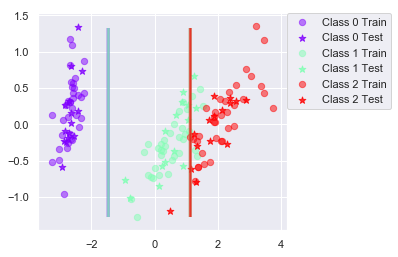

In [187]:
%matplotlib inline
plotBoundary(DecisionTreeClassifier(), dataset='iris',split=0.7)

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]


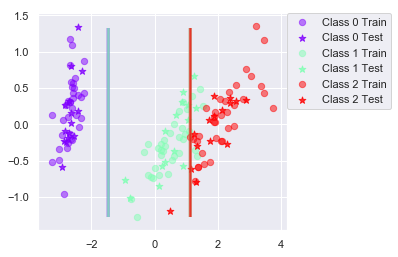

In [188]:
%matplotlib inline
plotBoundary(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='iris',split=0.7)

## Bonus: Visualize faces classified using boosted decision trees

Note that this part of the assignment is completely voluntary! First, let's check how a boosted decision tree classifier performs on the olivetti data. Note that we need to reduce the dimension a bit using PCA, as the original dimension of the image vectors is `64 x 64 = 4096` elements.

In [189]:
testClassifier(BayesClassifier(), dataset='olivetti',split=0.7, dim=20)

Trial: 0 Accuracy 6.67
Trial: 10 Accuracy 27.5
Trial: 20 Accuracy 19.2
Trial: 30 Accuracy 10
Trial: 40 Accuracy 21.7
Trial: 50 Accuracy 20.8
Trial: 60 Accuracy 18.3
Trial: 70 Accuracy 19.2
Trial: 80 Accuracy 20.8
Trial: 90 Accuracy 24.2
Final mean classification accuracy  18.2 with standard deviation 5.91


In [190]:
testClassifier(BoostClassifier(DecisionTreeClassifier(), T=10), dataset='olivetti',split=0.7, dim=20)

[ 9  0  0  1  1  3  9 39  2  3  6 17  4 39  4  5  5  5  6  6  6  7  9  7
  8  8  8 39  9 28 10 10  6 22 11 30  2  2  2 13 13  2 14 14 14  2 15 15
  2  2 16 39 17 17 18 18  6 10 19 28 20 20 20 21 33 21  2 22 35 23 23 23
 24 24 12 25 36 27 31 18 26 27 27 27 22 39 28 20 29 29 30 30  6 14 31 31
 37 32 32 33 33 33 34 34 34 35 18  6 36 25 36 37 39 37 36 38 38 39 39 39]
[ 9  0  0  1  1  3  9 39 13  3  6  6  4 39  4  5  5  5  6 30  6  7  9  7
  8  8  8 39  7 28 10 27 17 22 11 30  2  2  2 13 13  2 14 14 14 15 15 15
  2  2 16 22 17 17 18 18 18 27 19 28 20 20 20 21 33 21  2 22 35 23 23 23
 24 24 15 25 36 31 31 18 26 27 27 27 22 39 28 20 29 29 30 30 30 14 31 31
 32 32 32 33 33 33 34 34 34 35 18 30 36 25 36 37 22 37 32 38 38 22 39 39]
[ 9  0  0  1  1  5  9 39 13  5  6  6  4 39  4  5  5  5  6  6  6  7  9  7
  8  8  8 39  9 28 10 10 17 22 11 13  2  2  2 13 13  2 14 14 14 15 15 15
  2  2 16 22 17 17 18 18 18 10 19 28 20 20 20 21 33 21  2 22 35 23 23 23
 24 24 15 25 36 27 26  6 26 27 27 27 22 39 28 20 

[15 15 15  1  1  1 27  9 27 12 14 14  4  4 24  5 24 24 14 31 31 15  7 23
 37  8 14 15  9  2 14 35 10 11 11 11 12 12 12 13 35 13 14 24 14 16 24 16
 16 24 37 17 17 17 18 18 18 19 19 19 20  2 14 21 21 21 24 14 31 23 29 23
 24 24 30 11 25 35 16 26 26 31 35 31 23 23 28 23 29 29 30 30 30 31 14 31
 33 32 32 33 33 33 34 34 24 35 35  4 36 36 38 13 37 37 21 38 38 15 14 24]
[15 15 15 12  1  1 27  9 27 12 14 14  4  4 24  5 24 24 14 31 31 15  7 28
 37  8 14 15  9  2 14 35 10 11 11 11 12 12 12 13 35 13 14 24 14 16 24 16
 16 24 37 17 17 17 18 18 18 19 19 19 20 20 14 21 21 21 24 14 31 23 29 23
 24 24  4  8 25 35 10 26 26 31 35 31 28 23 28 28 29 29 30 30 30 31 14 31
 33 32 32 33 33 33 29 29 24 35 35  4 36 36 38 13 37 37 21 38 38 15 14 24]
[15 15 15  1  1  1  2  9  2 12 14 14  4  4 24  5 24 24 14 31 31 15  7 28
 37  8 14 15  9  2 14 35 10 11 11 11 12 12  3 13 35 13 14 24 14 16 24 16
 16 24 37 17 17 17 18 18 18 19 19 19 20 20 14 21 21 21 24 14 31 23 34 23
 24 24 30  8 25 35 16 26 26 31 35 31 28 23 28 28 

[37 22 37  1  1 36 36 20 32  3 12  5 22 22 22 36  6  5  6  6  6 10 10 30
 22 22  8  9  8 22 39 10 10 11 11 11 22 14 12 13 13 22 14 14 14 15 15 15
  6 22 37 17 17 17 22 22 18 14 19 17 30 20 20 21 21 21 22  7 22 30 28 15
 24 24 30 25 22 25 26 26 26 18 39 12 12 38 20 29 29 17 27 30 30 31 15 24
 33 32 32 30 33 34 32 17 22 35 35  6 37 36 36 37 13 37 38 38 38  5 11  5]
[37 22 37  1  1 36 36 34 34  3  3  5 22 22 22 36  6  5  6  6  6 10 10 30
 22 22  8  9  8 22 37 10 10 11 11 11 22 14 12 13 13 22 14 14 14 15 15 15
  6 22 37 17 17 17 22 22 18 14 19 17 30 20 20 21 21 21 22 31 22 30 28 15
 24 24 30 25 22 25 26 26 26 10 27 24 12 38 20 29 29 17  4 30 30 31 15 24
 33 32 32 30 33 20 34 17 22 35 35  6 37 36 36 37 37 37 38 38 38  5 11  5]
[37 22 37  1  1 36 36 34 34  3  3  3 22 22 22 36  6  5  6  6  6 18 18 30
 22 22  8  9  8 22 13 10 10 11 11 11 22 14  3 13 13 22 14 14 14 15 15 15
  6 22 37 17 17 17 22 22 18 14 19 17 30 20 20 21 21 21 22  7 22 30 23 15
 24 24 30 25 22 25 26 26 26 18 27 12 12 38 20 29 

[ 0 14  5  1 14 18  2  3  9  8  3  6  8  8  5  5  5  5  6 16  8  3  3  7
  8  8  8 28  7  0 31 27  7 18 11 10 24 24 24 13 13  9  8  1 14 15 23  8
 16 16  2 17 17 17 18 35 35  8 20  8 20 36  8 21 21 21  7 10  7 23 23 23
  0 24 24 25 15 13 26  9 26 27 27 27  8 17  8 29 29 17  4 34  8 31 18  8
 32 32 32 33 33 33 34  2 34 35 23  6 36 33 36 37 37  5  8 38  8  0 19  5]
[ 0 23  4  1  1 18  2 34 24  8  3  6  8  8  5  5  5  5  6 16  8  3  7  7
  8  8  8 28  7  7 13 27  7 11 11 11 24 24 24 10 13 24  8 14 23 15 14  8
 16 16  4 17 17 17 18 35 35  8 20  8 20 20  8 21 21 21 34 12 34 23 23 23
  7 24 24 25 10 13 26 24 26 27 27 27  8 17  8 29 29 17  4 30  8 31 18  8
 32 32 32 38 33 33 19  4 19 35 14  6 36 33 20 37 37  5  8 38  8  0 34  5]
[ 0 14  5  1  1 18  2 34  9  8  3  3  8  8  4  5  5  5  6 16  8 19  7  7
  8  8  8 28  7  0 13 27  7 11 11 10 24  9 24 13 13 15  8 14 14 15 23  8
 16 16  4 17 17 17 18 35 35  8 20  8 20 36  8 21 21 21 34 24 34 23 23 23
  0 24 24 34 15 11 26  9 26 27 27 27  8 29  8 29 

[ 1  1  3  1  1  3  2 17 25  3  3  3  4  4  3  4  5  5 16  6  3  3 37  3
  8  8  8 17 11  3 14 14 10 13 11 11  8  3  3 13  0  3 14  3 14  3  3 15
 16 36  2  3 39 39 18 18 16 28 19 34  3  3  4 21 21 21  3  3 22 22 17 23
  3 29 24 31 36 25 13 35 13 25 25  2  8 28 17 17 24 29 29 29  1 31  4 25
  4 32  9 33 33 33 14 29 34 35 35 23 36 21 35  9 37 37 38 38 38 39  3  3]
[ 1  1  3  1  1  3 10 17 25  3  3  3  4  4  3 29  5  5 16  6  3  3 37  3
  8  8  8 17 37  3 14 14 10 13 11 11  8  3  3 13  2  3 14  3 14  3  3 15
 16 36 16  3 39 39 18 18 16 28 19 34  3  3  4 21 21 21  3  3 22 22 17 23
  3 29 24 31 36 25 13 26 13 25 25  2  8 28 17 17 24 14 29 29  1 31  4 25
 29  9 32 33 33 33 34 34 34 35 35 23 36 32 35  7 37 37 38 38 28 39  3  3]
[ 1  1  3  1  1  3 25 17 25  3  3  3  4  4  3  4  5  5 18  6  3  3  0  3
  8  8  8 17  0  3 14 19 10 13 11 11 24  3  3 13 11  3 14  3 14  3  3 15
 16 36  2  3 39 39 18 18 35 28 19  9  3  3  4 21 21 21  3  3 22 22 17 23
  3 29 24 31 36 25 13 26 13 25 25 34 24 28 17 17 

[ 0  3 28  1  1  1 20 20 37 20 14 20 20 20 20  5  5  5 24 24  6 28  7 28
 20 20 20  9  7 28 14 20 10 11 11 12 14 12 20 20 13 20 14 20 20 26 14  6
 16 16  6 20 17 17 18 18 18 19 19 19 20 20 20 21 21 21 17 20 20 20  7 20
 24 24 24  6 25 20 26 26 26 27 27 25 20 28  9 29 29 29 11 30 11 20 31 13
 34 34 32 21 33 33 29 20 24 20 35 18 36 36 36 37 37 37 38 21 38 20 20 19]
[26  3  9  1  1  1 20 20 37 20 14 20 20 20 20  5  5  5 24 24  6  7  7 28
 20 20 20 23  7  9 14 20 10 11 11 12 14 12 20 20 13 20 14 20 20  0 14  6
 16 16  6 20 17 17 18 18 18 19 19 19 20 20 20 21 21 21 17 20 20 20 28 20
 24 24 24  6 25 20 26 26 26 27 27 25 20 28 28 29 29 29 11 30 11 20 31 13
 34 34 32 33 33 33 29 20 24 20  6 18 36 36 36 37 37 37 38 21 38 20 20 19]
[26  5 28  1  1  1 20 20  9 20 14 20 20 20 20  5  5  5 24 24  6 28  7 28
 20 20 20 23  7 28 14 20 10 11 11 12 14 12 20 20 13 20 14 20 20  0 14  6
 16 16  6 20 17 17 18 18 18 19 19 19 20 20 20 21 21 21 17 20 20 20  7 20
 24 24 24  6  2 20 26 26 26 27 27  2 20 28  9 29 

[ 0 23  7  1  1  1 28 22 26 17 22 17  4 30  4  5  5 35 35  6 35  7 28  7
  8  8  8 28 28  9 32 15 10 16 25 22 22 35 17 13 13 13 14 14 14 15 15 25
 16 25 16  8 17 28 31 15 18 29 29 15 17 17 17 21 21 21  8 25 12 35 23 23
 24 22 22 25 36 36  6 26 26 27 25 27 28 28 28  8 17 29 15 15 15 32 25 25
  6 32 32 33 33 33  7  7 34 35 35  6 36 25 36 17 37 37 38 21 38  7 11 17]
[ 0 23  7  1  1  1 28 22 26 17 22 17  4  5  4  5  5 35 35  6 35  0 28  7
  8  8  8 28 28  9 27 15 10 16 25 22 22 35 17 13 13 13 14 14 14 15 15 25
 16 25 16  8 17 28 31 15 18 19 19 15 17 17 17 21 21 21  8 25 12 35 23 23
 24 22 22 25 36 36  6 26 26 27 25 27 28 28 28 30 17 29 15 15 15 27 25 25
  6 28 32 33 33 33  7  7 19 35 35  6 36 25 36 17 37 37 38 21 38  7 11 17]
[ 0 23  7  1  1  1 28 22 26 17 22 17  4  4  4  5  5 35 35  6 35  0 28  7
  4  8  8 28 28  9 27 15 10 16 25 22 22 35 17 13 13 13 14 14 14 15 15 25
 16 25 16  8 17 28 31 15 18 19 19 15 17 17 17 21 21 21  4 25 24 35 23 23
 24 22 22 25 36 36  6 26 26 27 25 27 28 28 28  8 

[11 32 11 13 31 31  2 12 24 26 26 12  4  4  4  4 29 17 31 31  6  7  7  7
 36 36  8  9  4 29 10 14 15 11 11 13 12 12 16  7 25 25  4  4 12 26 31 23
 16 16 26 15 17 15  6 16  6  4 31 31  4 12  4 28 21 21  4 16 17 23 23 23
 24 24  4 25  7 37 26 26  0 27 12 12 12 12 12 29 29 29 13  4  4 26 26  6
 38 32 38 33 28 33  4  4  4 35 35 35 38 25 36 37 37 37 38 21 28  9  4  9]
[11  7 11 26 31 31  2 12 24 26 26 12  4  4  4  4 29 17 31 31  6  7  7  7
 36 36  8  9  4 29 10 14 15 11 11 26 12 12 16  7 25 25  4  4 28 26 31 15
 16 16 26  7 17  7  6 16  6  4 31 31  4 12  4 28 21 21  4 16 17 23 23 23
 24 24  4 25  2 37 26 26 26 27 12 12 12 12 12  7 29 29  0  4  4 26 26  6
 38 32 38 33 33 28  4  4  4 35 35 35 38  2 36 37 37 37 38 21 28  9  4  9]
[ 9 15  9 13 31 31  2 12 24 26 26 20  4  4  4  4 29 17 31 31  6  7  7  7
 36 36  8  9  4 29 10 14 10 11 11 13 12 12 16  7 25 25  4  4 17 26 31 23
 16 16 26 29 17 29  6 16  6  4 31 31  4 20  4 21 21 21  4 16 17 23 23 23
 24 24  4 25  7 25 26 26 26 27 12 12 12 12 12 29 

[23 24 23  1  0  0 34  2  2  2  5  3 35 35 22  5 12  5 35 12  6  7  7  7
 30 11  8  9  2  7 14 10 10 37 13 11 24 24 24 13 13 26 14 14 14  9  9  9
 16 16 16  7  3  5 16  6 18 19  2 19 24 24 20 21 21 21 22 22 22 23 35  7
  3 24 24 36 13  6 26 26 26 10 27 10 28 28 32 17 17 29 36 24 25 12 31 12
 32 34 32 33 21 33 35 20 24  2 16 35 32 36 36  9 37 37 38 21 38  9  8  9]
[ 0 24  0  1  0  0  2  2  2  7  5  3 35 35 22  5 12  5 35 12  6  9  7  9
 30  8  8  7 15  7 14 10 10 35 13 11 24 24 24 13 13 26 14 14 14  9  9  9
 16 16 16  7  3  5 16  6 18 19  2 19 24 24 20 33 21 21 22 22 22 23 35  2
  3 24 24 36 26  6 26 18 26 13 27 13 28 28 32 17 17 29 25 24 25 12 31 12
 32  4 32 33 33 33 35 20 24  2 16 35 32 36 36  9 37 37 38 38 38  9  8  9]
[15 24 15  1  0  0  2  2  2  2  5  3 35 35 22  5 14  5 35 12  6  7  7  7
 30 11  8  9  2  9  1 10 10 35 10 11 24 24 24 13 13 13 14 14 14  9  9  9
 16 16 16  2  3  5 16  6 18 19 34 19 24 24 20 33 21 21 22 22 22 23 35  2
  3 24 24 25 26  6 26 18 26 13 27 13  2 28 32 17 

[ 0  7 15  1  1  1  3 37  3  3  3  3  3  3  3 17  5  5  6 18  3  7 17  7
 15 15 15  9  7 39 10 10 10  8 11 11  3  3  1 13  8 13  3  3  3 27 32  8
 36 15  3  3  3  3 18 18 18  3  3 34  3  3  3 21 21 21  3  3  3 18 23 18
  3 15  3  3 25 25 26 26 26 27 27 34 28 28  3 29 17 17  3 30  3 31  3  3
 32 32 32 33 33 33 34  3 17 18  3 18  2 36 21 37 37 37 38 38 38  3 39 34]
[ 0  7 15  1  1  1  3 39  3  3  3  3  3  3  3 17  5  5  6 18  3  7 17  7
 15 15 15  9  7 39 10 10 10 15 11 11  3  3 30 13 15 13  3  3  3 16 32 30
 36 15  3  3  3  3 18 18 18  3  3 34  3  3  3 21 21 21  3  3  3 18 23 18
  3 15  3  3 25 25 26 26 26 27 27 27 28 28  3 29 17 17  3 30  3 31  3  3
 32 32 32 33 33 33 34  3 17 18  3 18  2 36 32 37 37 37 38 38 38  3 39 34]
[ 0  7 15  1  1  1  3 39  3  3  3  3  3  3  3 17  5  5  6 18  3  7 17  7
 15 15 15  9  7 39 10 10 10  8 11 11  3  3  1 13 30 13  3  3  3 16 17 30
 36 15  3  3  3  3 18 18 18  3  3  4  3  3  3 21 21 21  3  3  3 18 23 18
  3 15  3  3 25 25 26 26 26 27 27 27 28 28  3 29 

[ 0 37 12  1 12 12 22 16 25 12 12 27  4  4 30  0  5  5 27  6  6  7  9 29
  8 12 19  9  9  9 10 19 10 15 11 37 22 22 22 25 22 25 22 12 12 11 12 22
 16 16 34 17  8 17 18 18 18  2 39 17 24 20 20 21 21 38 12 22 22 23 23 23
 12 12 24 30 30 25  6 26 16 27 27 27 20 20 20 29 29 29 30 30 30 31  6 11
 32 32 32 33 30 30 32 34 32 27 35 27 36 30 25 37 37 37 38 38 38 39 23 22]
[ 0 37 12  1 12 12 39 16 25 12 12 25  4  4 30  0  5  5 27  6 15  7  9 29
  8 12 19  9  9  9 10 19 10 11 11 37 22 22 22 25 22 25 22 12 12 15 12  1
 16 16 34 17  8 17 18 18 18 19 22  8 24 20 20 21 21 33 12 22 22 23 23 23
 12 12 24 36 36 25 26 26 16 27 27 27 20 20 20 29 29 29 36 30 30 26 31  6
 32 32 32 21 30 30 32 34 32 27 35 27 36 36 25 37 37 37 38 38 38 22 23 22]
[ 0 37 12  1 12 12 22 16 25 12 12 25  4  4 30  4  5  5 35 15  6  7 15 29
  8 12 19  9  9  9 10 19 10 15 11 37 22 22 22 25 22 25 22 12 12 11 12  1
 16 16 34 17 17 15 18 18 18  2 22 19 24 20 20 21 21 38 12 22 22 23 23 23
 12 12 24 36 30 25 26 26 16 27 25 27 20 20 20 29 

[ 1 28 39 14  1  1  2 12 37 14  3  3  4  4 22  5  5  5  6  6 18 29 28  6
  9  8 24 28  8  8 18 10 10 11 11  8  3 14 24 13 13 13 22 29 14 29 29  6
  3  6 26  3  3  3 29 18 18  3  3 19 20 20 29 21 21 38 22  3 17 23 23 29
 24 24 24 25 16 24 29 26 26 12 25 25 21 38 28 12 20 29 12 30 30 31 31 31
 38 23 31 33 33 33  5  5  3 35 35 35 36 36 33 17 17 37 38 38 21  3  8  0]
[ 1 28 11 14  1  1  2 12 37 14  3 17  4  4 22  5  5  5  6  6 19 29 28  5
  9  8 17 28 29  9 18 10 10  0 11  8  3 14 24 13 13 13 22 29 14 29 29 18
  3  6 26  3  3  3 29 18 18  3  3 19 20 20  8 38 21 21 22  3 17 23 23 29
 24 24 24 25 16 24 29 26 26  7 25 25 21 38 28 39 20 29 39 30 30 26 26 31
 32 23 30 33 33 33  5  5  3 35  0 35 36 36 33 17  3 37 38 38 38  3  9 39]
[ 1 28  0 14  1  1 12  2 37 14  3  3  4  4 22  5  5  5  6  6 18 29 28  0
  9  8 24 28  8  8 18 10 10 11 11  8  3 14 24 13 13 13 22 29 14 29 29 16
  3  6 26  3 17  3 29 18 18  3  3 19 20 20 29 21 21 21 22  3 17 23 23 29
 24 24 24 25 16 24 29 26 26 13  2 25 38 32 28 12 

[18 26 18 18  1  1  2  2  2 14  3  3 18 18 18 18  5  5  6 27 18  7  3  7
  8  3  8  8 22  9 10  7  7  9 39 11  3  3 18 18 13 13 14 22  8 27 27 18
 18 18 16 18  8  8  7 18 18 19 22 18 20 18 18 21 21 21 18 22 18 18 24 18
 22  7 22 25 20  3  7 18 26  3  3 27 28 28 28 32 18 29 30 30 30 18 18 18
 32 32 32 33 33 33 18 34 18  8 18  6 33  2 37 37  8 37 38 38 38  3 39  0]
[18 26 18 18  1  1  2  2  2 14  3  3 18 18 18 18  5  5  6 27 18  7  3  7
  8  3  8 25 22  9 10  7  7  9 39 11  3  3 18 18 13 13 14 22  8 27 27 18
 18 18 16 18  8  8  7 18 18 19 22 18 20 18 18 21 21 21 18 22 18 18 24 18
 22  7 22  8 20  3  7 18 26  3  3 27 28 28 28 32 18 29 30 30 30 18 18 18
 32 32 32 21 33 21 18 34 18  8 18  6 38  2 37 37  8 37 38 38 38  3 39  0]
[18 26 18 18  1  1  2  2  2 14  3  3 18 18 18 18  5  5  6 27 18  7  3  7
  8 32  8 25 22  9 10  7  7  9 39 11  3  3 18 18 13 13 14 22  8 27 27 18
 18 18 16 18  8  8  7 18 18 19 22 18 20 18 18 21 21 21 18 22 18 18 24 18
 22 29 22  8 20  3  7 18 26  3  3 27 28 28 28 29 

[37  1 11 23  1  1 18  2 20 22 22 20  4 20  4  5  5  5 18  4  6  7  7  7
  8 20 37  7  8  9 10 10 19  2 11 11  2 20 20 22 10 31 23 23 20 20 15 35
 31 16 31 17 20 29 31 18  3 17 20 19 20 20 20 21 21 38 22 20 20 23  8 23
 20 20 20 25 25 22 26 26 26 22 27 25 20 28 38 29 29  4 11 30  0 31 13 31
 32 32 32 33 33 33  4  4 20 35 35 36 36 36 38 37 37 37 38 38 38  8 20 20]
[37  1 11 14  1  1 18  2 20 22 22 20  4 20  4  5  5  5 13 32  6  7  7  7
  8 20 37  7  8  9 10 10 10  2 11 11  2 20 20 22 25 31 14 14 20 20 15 35
 31 16 31 17 20 17 18  3 18 29 20 19 20 20 20 21 21 21 22 20 20 23  8 23
 20 20 20 25 25 22 26 26 26 22 27 27 20 28 38 29 29  4 39 30 39 31 13 31
 32 32 32 33 33 33  4  4 20 35 35 36 36 36 21 37 37 37 38 38 38  8 20 20]
[37  1 11 23  1  1 18  2 20  2 22 20  4 20  4  5  5  5 18  4  6  7  7  7
  8 20 37  7  8  9 10 10 10 22 11 11  2 20 20  2 10 31 23 23 20 20  0 36
 18 16 18 17 20 29 18  3 18 17 20 19 20 20 20 32 21 21 22 20 20 23  8 23
 20 20 20 25 25 22 26 26 26 22 27 25 20 28 38 29 

[11  4 15 22  1  1 26 34  2 10 31  0  4 29  4  4  5  5 22 12 31 25 12  7
  8 37  8  6  4 36 10 10 10 11 11 11  4  3  1 13  0  6 14 28 14  4 25  4
 37 12 16 17 17 28 18 18 18 19 19 10 20  4  3 28 21 21  8  8 10 23 23 23
  4  4  4 25 25 23 26 22  1 27 27 10  8 28 28 29 29 29 30 28 28 17 18 31
 32 32 32 30 21 30 34 34 34 35  1 35 36 36  2 37 37  8 21 38 38  4  4 11]
[11  4 15 22  1  1 26 34  2 10 31  7  4 29  4  4  5  5 22 12 31 25 12  7
  8 37  8 12  4  9 10 10 10 11 11 11  4  3  3 13  7  6 14 28 14  4 25  4
 37 12 15 17 17 28 18 18 18 19 19 10 20  4  3 21 21 38  8  8 10 23 15 23
  4  4  4 25 25  2 26 22  1 30 27 27  8 28 28 29 29 29 30 28 28 17 18 31
 32 32 32 22 36 22 34 34 34 35  1 35 36 36  2 37 37  8 28 38 38  4  4 11]
[11  4 15 22  1  1 10 34  2 10 31  0  4 29  4  4  5  5 22 12 31 25 12  7
  8 37  8 12  4  9 10 10 10 11 11 11  4  1  1 13  0  6 14 28 14  4 25  4
 37 12 16 17 17 28 18 18 18 19 19 10 20  4  3 21 21 38  8  8 10 23 15 23
  4  4  4 25 25  2 26 22  1 27 27 10  8 28 28 29 

[15  0 20  1  1  1 22 34 20 20 31 12  2  2  2 34  5  5 31 18 31 17 34  7
  8  8  8  9  9 39 10 35 10 11 11  0 12 16  0 20 13 13 24 20 20  9 16  9
  6 16 16 17 17  9 18 18 18 19 39 19  8  8 20 21 21 21 12  8 22  9 15  1
 24 24 24 25 25 27 26 15  0 27 27 27 33 34 20 29 29 29 30 25 30 31 31 31
 32  4 32 33 33 33 29 34 34 35  1 35 36 32 36 37 37 37 38 33 38 20 34 34]
[15  0 20  1  1  1 22 34 20 20  3 12  2  2  2 34  5  5 16 18 31 17 34  7
  8  8  8 28  9 19 10 35 10 11 11  0 12 16  0 20 13 13  2 20 20  9 15  9
  6 15 16 17 17  9 18  6 18 19 19 19  8  8 20 21 21 21 12  8 22  9 15  1
 24 24 24 25 25 27 26 15  0 27 27 27 33 34 20 29 29 29 30 25 25 31 31 15
 32  4 32 33 33 33 29 34 34 35  1 35 36 38 36 37 37 37 38 33 38 20 34 34]
[15  0 20  1  1  1 22 34 20 20  3 12  2  2  2 34  5  5 16 18 31 17 34  7
  8  8  8 28  9 19 10  1 10 11 11  0 12 16  0 20 13 13 24 20 20  9 15  9
  6 31 16 17 17  9 18 18 18 19 19 19  8  8 20 21 21 21 12  8 22  9 15  1
 24 24 24 25 36 27 26 15  0 27 27 27 33 34 20 29 

[26 22  0 23  1  1 25 17 28 17 17 37 29  4 17 37  5  5 37  6 37 37  7  7
 22 22 22  9  9 17 15 10 10 35 39 35  1 17 17 13 13 16 17 14 17 14 17 15
 19 16 16 17 17 17 15 18 35 19 19 17 20 20 20 21 21 21 22 15 22 14 23 23
  7 17 17 25 25 18 26 26  9 27 27 27 28 28 32 29 29 29  1 30 30 31 15 15
 32 32 32 33 33 33 17 32 37 27  6 17 36 36 36 37 37 37 38 38 38  4 37 19]
[26 22  0 23  1  1 25 17 28 17 17  4 29  4 17  4  5  5  4  6  4  4  7  7
 22 22 22  7  9 17 15 10 10 11 11 11  1 17 17 13 13 16 17 14 17 23 17 15
 19 16 16 17 17 17 15 18 35 19 19 17 20 20 20 21 21 21 22 15 22 14 23 23
 31 17 17 25 25 18 26 26  3 27  7 27 28 28 32 29 29 29  1 30 30  3 15 15
 32 29 32 33 33 33 17 32  4 27  6 17 36 36 36 37 37 37 38 38 38  4  4 19]
[26 22  0 14  1  1 25 17 28 17 17  4 29  4 17  4  5  5  4  6  4  4  7  7
 22 22 22  7  9 17 15 10 10 11 11 11  1 17 17 13 13 16 17 14 17 23 17 15
 19 16 16 17 17 17 15 18 35 19 19 17 20 20 20 21 21 21 22 15 22 23 14 23
  9 17 17 25 30 18 26 26 31 35 27 27 28 28 29 29 

[ 0 37  0  1 35  1 12 25 20 20  3  3  4  4  4 12  5  5  1 16  6  7  7  7
  8 30  8 28 12 20 15 15 10  8 16 11 12 12 12 37 31 37  4  1 14  0 10 29
 30 30 32  8 17 17 18 18 18 19  2 19 20  4 20 21 21 21  4 22  0 23 10 23
  3 24  3 25 25 25 26 31 16  7 16 27 12 28 28 29 29  9 30 30 30  3  1 31
 32 32 32 28 30 33 32 39 34 25 35 18 36 36 36  8  3 37 38 28 38 19 39  9]
[ 0 37 32  1 35  1 12 25 20 20  3  3  4  4  4 12  5  5  1 16  6  7  7  7
  8 30  8 28 12 20 15 15 24  8 16 11 12 12 12 37 11 37  4  1 14  0 10 29
 16 16  3  8 17 22 18 18 18  2 19 19 20  4 20 21 21 21  4 22  3 23 10 23
  3 12  3 25 25 25 26 11 16  7 30 27 12 34 28 29 29  9 30 30 30  3  1 31
 32 37 32 34 30 33 34 39 34 25 35 18 36 36 36  8  3 37 38 38 38 19 39  9]
[ 0 37  0  1 35  1 12 25 20 20  3  3  4  4  4 12  5  5  1 16  6  7  7  7
  8 30  8 28 12 20 15 15 10  8 16 11 12 12 12 37 11 37  4  1 14  0 35  9
 30 30 32  8 17 22 18 18 18 19 19 19 20  4 20 21 21 21  4 22  0 23 10 23
  3 24  3 25 25 25 26 11 16  7  1 27 12 34 28 29 

[14  0  0 30  1 11 39  2  4  3 17 31  4  4  4  5 12  5 16 16 31  7  7  9
  4 39  8  2  4  9 10 10 10 39 11 39 12 12 12  4 13 12 14 14 14  0  0 15
 35  4 16 17  3  8 18 18 18 28 19  3  4  9 20 36 21 21  8 22 19 14 23 23
 24 24  4 36 35  2 26 26 26 27 27 27 30  8 28 29 29 29 30 30 30 31 30 25
 16 32 32 33 33 33 34  4  4 14 14 18 36 36 36 37  7 37 38 28 38 39 37  3]
[14  0  0 30  1 26 39  2  4  3 14 31  4  4  4  5 12  5  6  6 31  7  7  9
  4  8  8  2  4  9 10 10 10 39 37 11 12 12 12  4 13 12 14 17 14 15  0 15
 25  4 16 17  3 22 18 18 18 28 19  3  4  9 20 21 21 21 22 22 19 14 23 23
 24 24  4 25  2 25 26 26 26 27 27 27 30 11 38 29 29 29 30 30 30 31 30  2
 32 32 32 33 33 33 34  4  4 14 14 18 36 36 36 37  7 37 38 38 38 39  8  3]
[17  0  0 18  1 11 39  2  4  3 14 31  4  4  4  5 12  5  6 16 31  7  7  9
  4  8  8  2  4  9 10 10 10 11  8  8 12 12 12  4 13 12 14 14 14  0  0 15
  2  4 16 17  3  8 18 18 18 20 19  3  4  9 20 21 21 21  8 22 19 35 23 23
 24 24  4 36 35 35 26 26 26 27 27 27 30  8 28 29 

[ 0 14 19 14  1 14 20  8 20  3 14 30 14 14 20  1 14  5  6  6 31 14  7  0
 30 14 14 14  9 14 10 10 14 11 39 11  6 29 28 14 13 13 14 18 14 30 14 14
 14  2 14 19 17 14  7 14  7 19 19 19 20 20 20 21 33 33 14 14 14 14 14 23
 14 14 14 25  8 16 26 31 26 14 14 14 28 28 28 29 24 24 29 29 30 10 31 31
 32 32 28 29 29 38 34 14  2 19 14 14 37 33 36 25 25 36 38 38 38 37 39 39]
[ 0 14 19 14  1 14  4 16  4  3 14 32 14 14  4  1 14  5  6  6 31 14  7  7
 30 14 14 14  9 14 10 10 14 11  8 11  6 29 28 14 13 13 14 19 14 32 14 14
 14 25 14 19 17 14  0 14  0 19 19 19 20 20 20 21 33 33 14 14 14 14 14 23
 14 14 14 25 16 36 26 31 26 14 14 14 28 28 28 29 24 24 29 29 30 10 31 31
 32 32 28 29 29 38 34 14 27 18 14 14 36 33 36  2  2 37 38 38 38 37 16 39]
[11 14 19 14  1 14 20 39 20 27 14 27 14 14  4  1 14  5  6  6 31 14  7  7
 30 14 14 14  9 14 10 10 14 11  8 11  6 29 28 14 13 13 14 18 14 30 14 14
 14 25 14 19 17 14  0 14  0 19 19 19 20 20 20 21 33 33 14 14 14 14 14 23
 14 14 14 25 39 16 26 31 26 14 14 14 28 28 28 29 

[ 0  0 26 14  1  1 20  2 36 20  3 12 12 12 10  5  0  0 14  6 18  7  3  7
  8 12  3  9  9 12 31 31 10 11  0 16 28 12  0 13 13 13 17 14 14 23 14 15
 15 12 35 17 17 17 18 35 31 19 19 19 20 20 20 32 21 21 12 17  3 23 23 23
 12 12 12  3 16 16  1 26 13 15 14 12  9 38 28 29 29 29 30 30 30 35 31 31
 36 13 21 33 33 33 34  2 34 35 35 14 36 36 36  8 36  7 38 38 38 37  3  8]
[ 0  0 26 14  1  1 20 16 36 20  3 12 12 12 13  5  5  5 14  6 18  7  5  7
  8 12  3  9  0 12 31 31 10 11  8 11 28 12  0 13 13 13 17 14 14 23 14 15
 27 12  6 17 17 17 18 18 31 19 19 19 20 20 20 32 21 21 12 17  3 23 23 23
 12 12 12  3 16 16  1 26 13 27 14 12  9 38 28 29 29 29 30 30 30  6 31 31
 32 13 21 33 33 33 34  2 34  6  6 14 36 36 36 37 36  8 38 38 38 37  3  8]
[ 0  0 26 14  1  1 25 16 36 20  3 12 12 12 13  5  3  3 14  6 18  7  3  7
  8 12  3  9  9 12 31 31 10 11  8 16 28 12  0 13 13 13 17 14 14 23 14 15
 15 12 35 17 17 17 18 35 31 19 19 19 20 20 20 32 21 21 12 17  3 23 32 23
 12 12 12  3 16 16  1 26 13 27 14 12  9 38 28 29 

[11  9  0  1  1  1 25 26 25  3  3 15  4  4  8  8 15  5  6  6 16  0  0  3
  8  8  8  9  9  8 10 10 10 11  8 11  8 35  8 13 13 13 14 15 14 15  6  0
 16 16 16  8  8  8 25 25 25  2 19 19  8  8  8 21 38 21  8  8 25 23 23 23
  8  8  8 25 25 25 31 26 26 27 27 27  8 28 32 10 32  8 30 30 30 31 31 32
 32  8 32 15 33 36  4 32  4 35 35 35 12 36 16  8  8  8 38 38 38  8  8  8]
[11  9  0  0  1  1 25 26 25 12 12 15  4  4  8  8 15  5  6  6 16  0  0  0
  8  8  8  9  9  8 10 10 10 11  8 11  8 35  8 13 13 13 14 30 14 15  6  0
 16 16 16  8  8  8 25 25 25  2 19 19  8  8  8 21 38 38  8  8 25 23 23 23
  8  8  8 25 25 25 31 26 26 10 27 27  8 28 29 10 29  8 30 15 30 26 31 23
 32  8 32  6 33 36  4 32  4 35 35  6 36 36 16  8  8  8 38 38 38  8  8  8]
[11  9  0  1  1  1 25 26 25  3  3 15  4  4  8  8 15  5  6  6 16  0  0  3
  8  8  8  9  9  8 10 10 10 11  8 11  8 35  8 13 13 13 14 30 14 15  6  0
 16 16 16  8  8  8 25 25 25 19 19 19  8  8  8 21 38 21  8  8 25 23 23 23
  8  8  8 25 25 25 31 26 26 27 27 27  8 28 32 10 

[17  0  0  1  1  0 15  2 29 17 17 17 17 17 17  5 17  5 17  6  6 17 17 17
 39  8  8 17 13  9 27  8 13 22 12 11 17  2  8 22 10  2 14 17 14 23 12 17
 16 16 16 17  7 17 18 18 18 34 19 19 17 29 15 21 21 38 17 22  8 23 23 23
 24 24 24 25 13 25 26 26 26 27 27 27 28 28 28 29 29 29 12 30 30  2 18 31
 29 32 29 38 33 33 24 34 17 18 25 35 25 36 38 17 17 17 38 38 21  8 19 17]
[17  0  0  1  1  0 15  2 29 17 17 17 17 17 17  5 17  5 17  6  6 17 17 17
  8  8  8 17 26  9  2 39 13 22 12 11 17  2 14 22 31 27 14 17 14 23 12 17
 16 16 16 17 15 17 18 18 18 34 19 19 17 29  7 21 21 32 17 22 14 23 23 23
 24 24 24 25 13 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 27 18 31
 29 38 29 28 33 33 24 34 17 18 25 25 25 36 32 17 17 17 38 28 21 14 19 17]
[17  0  0  1  1  0 15  2 29 17 17 17 17 17 17  5 17  5 17  6  6 17 17 17
  8  8  8 17 13  7 27 14 13 25 12 11 17  2 39 25 31  2 14 17 23 23 12 17
 16 16 16 17  7 17 18 18 18 34 19 19 17 29 15 21 21 38 17 22 14 23 23 23
 24 24 24 25 16 25 26 26 26 27 27 27 28 28 28 29 

[ 2 17 35  1  1  1  2 37 20 32 14 14  4  4 22  5  0  0 35  6  6  4  4  7
  9 17  9  9  9 17 14 35 35 16  2  2 12 26 28 17  4 25 14 14  1 35 35 35
 17 17 17 17 17 17 35 14 35 10 19 19 20 23 20 28 21 21 22 22 22 14 28  4
 17  0 17  0  2 37 26 26 26 27 27 27 29 28 28 29 29 29 30 30 30  4 35 35
 32 33 34 33 33 33 34 20 17 35  6 35 36 36 21 37 37 37 38 38 38 15  9  0]
[ 0 17 35  1  1  1  2  2 20 32 14 14  4  4 22  5  0  0 35  6  6  4  4  7
  9 17  9  9  9 17 14 35 35 25  8  8 12 26 28 17  4 25 14 14 14 35 35 35
 17 17 17 17 17 17 35 14 35 27 19 19 20 23 20 38 21 21 22 22 22 14  2  4
 17  0 17  0  2  2 26 26 26 27 10 27 29 28 28 29 29 29 30 30 30  4 35 35
 32 33  4 33 33 33  4 20 17 35  6 35 36 36 21 37 37 37 38 38 38 19  9  0]
[ 2 17 35  1  1  1  2  2 20 32 14 14  4  4 22  5  0  0 35  6  6  4  4  7
  9 17  9  9  9 17 14 35 35 16  2  2 12 12  2 17  4 25 14 14  1 35 35 35
 17 17 17 17 17 17 35 14 35 10 19 19 20 23 20 28 21 21 22 22 22 14 28  4
 17  0 17  0 37  2 26 12 26 27 27 27 29 28 28 29 

[15 16  0  3  3  1 16 12 16  3  0  0 14 25 14  0  5  0  3 31 35  7  7  9
  8 37 37  9 12 15 10 10 10  8 16 25 25 16  0 13 13 13  3 17 14 15 15 15
 16 16 11 17 17  0 18 18 18 19 19 36 20  3 20 21 21 21 17  0 25 23 15 23
 30  0 31 25 25 13 26 26 26 27 27 10 28  0 32 29 29 29 30 30 30 31 31 31
 32 29 29 33 33 33  4 34 34  3 35 35 36 36 35 37 37 37 38 38 21 39  3  9]
[15 24  0  3  3  1 24 35 24  3  2  0 14 25 14  0  5  0 12 31 35  7  7  9
  8 37 37  9 12  2 10 10 10  8 11 25 25 24  0 13 13 13  3 17 14  3 15 15
 24 24 11 17 17  0 18 18 18 19 19 36 20  3 20 21 21 21 17  0 25 23 23 23
 30  0 31 25 25 10 26 26 26 27 27 13 28  2 38 29 29 29 30 30 30 31 31 31
 32 20 32 33 33 33  4 34 34  3 35 35 36 36 36 37 37 37 38 38 38 39  3  9]
[15 16  0  3  3  1 16 36 16  3  2  0 14 25 14  0  5  0 12 31 26  2  7  9
  8 11 11  9 12  2 10 10 10  8 11 25 25 16  0 13 13 13  3 17 14  3 15 15
 16 16 11 17 17  0 18 18 18 19 19  1 20  3 20 21 21 21 17  0 25 23 23 23
 30  0 31 25 25 13 26 26 26 27 27 10 28  2 32 29 

[24  7 15  1  1  1 29 39 39 22 39 39 39 39 39  5  5  5 11 35  6  7 39 22
  8 22 32 29 22 39 10 10 15 11 11 39 39 39 24 39 24 13 18 15 23 31 24 15
 24 24 24 17 39 22  9 24 18 19 19 29 39 20 20 21 21 28 22 22  4 23 15 29
 24 24  4 36 22 39 39 22 27 27 27 27 28 29 28 39 29 29 29 30 30 31 39  6
 32 32 33 33 33 33 24 24 34 18 35 18 36 36 21 39 37 39 38 38 33 39 39 11]
[24  7 15  1  1  1 29 39 39 22 39 39 39 39 39  5  5  5  0 35  6  7 39 22
  8 22 29 29 22 39 10 10 15 11 11 39 39 39 24 39 24 13 18 15 23 15 24 15
 24 24 24 17 39 22  9 24 18 19 19 29 39 20 20 21 21 38 22 22  5 23 15 29
 24 24  5 36 22 39 39 22 28 27 27 27 28 29  7 39 29 29 29 30 30 31 39  6
 29 32 32 33 33 33 24 24 32 18 35 18 36 36 28 39 37 39 38 38 21 39 39 11]
[24  7 15  1  1  1 29 39 39 22 39 39 39 39 39  5  5  5 11 35  6  7 39 22
 30 22 32 29 22 39 10 10 15 11 11 39 39 39 24 39 24 13 18 15 31 15 24 15
 24 24 24 17 39 22  9 24 18 19 19 29 39  9 20 21 32 38 22 22  5 23 15 29
 24 24  5 36 22 39 39 22  7 27 27 27 28 29 28 39 

[ 0 24  0  0  1  1  2  9 39  3  3  0 24 24 24  5  3  3 18 24  6 32  7 24
 24 24 24  9 10  9 10 10 10 11 11 11 12  0 34 13 12 13 14 14 24 24 15  6
  6 18  3 12 24 24 18 18 18 19 28 30 20 20 20 21 21 21 10 22 24 23 23 24
 24  7 28 25 20 25  6  6  6 27 27 19 38 38 37 29 32 29  2  2 30  7 18  7
 28 32 32 33 33 21 24 34 24 31 35 24 38 36 36 37 37 37 38 38 38 11 12 24]
[ 0 24  0  0  1  1  2  9 39  3  3  0 24 24 24  5  3  3 18 24  6 32  7 24
 24 24 24  9 10  9 10 10 10 11 11 11 12  0 34 13 12 13 14 14 24 24 15  6
  6 18  3 12 24 24 18 18 18 30 19 19 20 20 20 21 21 21 10 22 24 34 34 24
 24  7 30  2 20  2  6  6  6 27 27 28 38 38 37 29 32 34 34 34 30  7 18  7
 28 28 32 33 33 21 24 34 24 31 35 24 38  2  2 37 37 37 38 38 38 11 12 24]
[19 24  0  0  1  1  2  9 39  3  3  0 24 24 24  5  3  3 18 24  6 32  7 24
 24 24 24  9 10  9 10 10 35 11 11 11 12  0  2 13 12 13 14 14 24 24 15 31
  6 18  3 12 24 24 18 18 18 30 19 19 20 20 20 21 21 21 10 22 24 23 23 24
 24  7 30 25 20 25 31 31 31 27 27 19 38 38 37 29 

[ 0  0  7  1  1  1 25  4  4  4  4  4  4  4  4  5  4  5  6  6  3  7  7  7
  8  8 11  9 24  9 10 10 10 11 11 11 12  4  1 13 13 13 14  4 14 16 15 23
 16 25 10  4 34 32 16 18 18  4 20 15  4  4  4 21 21 32  4  4 25 23 23 14
 24  2 16 22 15 18 26 26 12 27 30 27 28 21  2 29 29 29  1 30 30 15  3  3
 32 32 32 33 33 33  4 24 34 35  6 35 25 25 25 37 37 37 32 38 38 28  0 39]
[ 0  0  7  1  1  1 25  4  4  4  4  4  4  4  4  5  4  5  6  6  3  7  7  7
  8  8 11  9 24  9 10 10 10 11 11 11 12  4  1 13 13 13  0  4 14 15 15 23
 16 25 10  4  6 32 31 18 18  4  7  0  4  4  4 21 21 21  4  4 25 23 23 23
 24  2 16 22 15 18 26 26 12 27 30 27 28 38  2 29 29 29  1 30 30 31  3  3
 32 32 32 33 33 33  4 24 34 18 35 35 25 25 25 37 37 37 38 38 38 28 15 11]
[ 0  0  7  1  1  1 25  4  4  4  4  4  4  4  4  5  4  5  6  6  3  7  7  7
  8  8 11  9 24  9 10 10 10 11 11 11 12  4  1 13 13 13 14  4 14 16 15 23
 16 25 27  4  6 32 31 18 18  4 20  0  4  4  4 21 21 21  4  4 25 23 23 23
 24  2 16 22 15 18 26 26 12 27 16 27 17 38 17 29 

[13 15  0 26  0 11 18  4  4  4 15 12  4  4  4 29 11  5  4  4  6  7  7  7
  4  4 34 34  4  7  3 10 18 11 11 11  4 35  4 25 13 13 14  4  4 15  4  6
 16 34 34  4  4  4 34 34 34 19 19 14  4  4  4 21 21 21  4  4 34 23  4  4
  4  4  4 25 25 25 26 16 26 27  9 10 38 28  4 29  4 29 11 30 30 31  4 31
 21 32 29 33 38 33 34 14 14  4 16 16 32 36 36  4 28  4 38 28 38  4  4  4]
[13 23  0 12  0  0 18  4  4  4 15 12  4  4  4 29  0  5  4  4  6  7  7  7
  4  4 34 34  4  7 17 10 18 11 11 11  4 30  4 25 13 13 14  4  4 15  4  6
 16 34 34  4  4  4 34 34 34 19 19 14  4  4  4 21 21 21  4  4 34 15  4  4
  4  4  4 25 25 25 26 16 26 27 28 10 38 28  4 29  4 29  0 30 30 31  4  6
 33 32 29 33 33 33 34 14 14  4 16 16 21 36 36  4  9  4 38 28 38  4  4  4]
[13 23  0 12  0  0  6  4  4  4 15 12  4  4  4 29  0  5  4  4  6  7  7  7
  4  4 34 34  4  7 14 10  6 11 11 11  4 30  4 25 13 13 14  4  4 15  4 35
 16 34 34  4  4  4 34 34 34 19 19 14  4  4  4 21 21 21  4  4 34 23  4  4
  4  4  4 25 25 25 26 16 26 27 28 10 28 28  4 29 

[ 0 12  0  1  1  1 19  2  2  3  7  3  4  4  4  5  5  5  6 31  6  7  2  7
  3  8 22  9  2  9 16 10 10 11 35 11 12 12 22 11 13 13 14 17  3  6 15  6
 16 16  6 17 17 17 18 18 31 19 19 19  2  2 20 21 21 21 17  3  3 23 23 15
 24 24 34 25 25 25 26 11 26 31 27 27  2 28  2 29 29 29  2 30 30 31 31 31
 32 32 28 33 38 33 34 34  9  6 35  6 36 36 36 37 37  2 38 38 38  9  9 39]
[ 0 12  0  1  1  1 39  2  2  3  7  3  4  4  4  5 12 12  6 18  6  7  2  7
  3  8  8 39  2 39 10 10 10 11 15 11 12 12 22 11 13 13 14 17  3  6 15  6
 16 16  6 17 17 17 18 18 18 19 19 19  2  2 20 21 21 21 17  3  3 23 23 15
 24 24  4 25 25 25 26 11 26 18 27 27  2 28  2 29 29 29  2 30 30 18 31 31
 32 32 28 33 38 33 34 34  9  6 35  6 36 36 36 37 37  2 38 38 38 39 39 39]
[ 0  1  0  1  1  1 19  2  2  3  7  3  4  4  4  5  5  5  6 18  6  7  2  7
  3  8  8  9  2 39 16 10 10 11 35 11 12 12 22 11 13 13 14 17  3  6 15  6
 16 16  6 17 17 17 18 18 18 19 19 19  2  2 20 21 21 21 17  3  3 23 23 15
 24 24  4 25 25 25 26 11 26 18 27 27  2 28  2 29 

[ 0  4  1  0  1  1  2  2 16 12 26 34  4  4 29  5  4 34 34  6  6  7  7  4
 12 12  7  9 12 12 10 31 10 11 11 39 12  7 12 13  7 12 12 12 12 15  4 15
 16 34  6 17 17 12 18 12 12 19 19 17  7 20 20 21 21 21 12 12 12  7 23 20
 12 12 12 25 16 25 26 26 27 32  6 27 28 28  7 29 29 29 30 30 30 31 31  7
 32 32 23 33 33 33 34 34 12 12  6 35 36 36 36 37 37 37 21 21 38  4 12  4]
[ 0  4  1  0  1  1  2  2  2 12 15 34  4  4 29  5  4 34 34  6  6  7  7  4
 12 12  7  9 12 12 10  7 10 11 11 11 12  7 12 13  7 12 12 12 12 15  4 15
 16 34  6 17 17 12 18 12 12 19 19 17  7 19 19 21 21 21 12 12 12  7 23 20
 12 12 12 25  2 25 26 15 27 32  6 27 28 28  7 29 29 29 30 30 30 31 31 31
 32 32 23 33 33 33 34 34 12 19  6 35 36 36 36 37 37 37 21 38 38  4 12  4]
[ 0  4  1 18  1  1  2  2  2 12 15 34  4  4 29  5  4 34 18  6  6  7  7  4
 12 12 37  9 12 12 10 31 10 11 11 39 12  7 12 13 20 12 12 12 12 15  4 15
 16 18  6 17 17 12 18 12 12 19 19 17 20 20 20 21 21 21 12 12 12  7 23  7
 12 12 12 25  2 16 26 15 27 32  6 27 28 28  7 29 

[ 0  0  0  8 23 14 36 25  9  8 10  6  4  4 22  5 22 29  6  6  6  9  7  9
  8  8  8  9 29  6  3 10 10 11 25  6 12  8 22 10 13 13 14 14 14  6 27 15
 30  6 25 17  0 17  6  6 18 19  8 19 20  8 20 21 38 21  6  6 30 22 23 23
 24  6  6 12 25 18 26 26 18 12 27 27 28  9  9 29  9 29  8 27  8 27  1 31
 38 27 38 33 33 33 34 34 34  6 35  8 36 36 36  0 32 37 38 38 38  8  9  9]
[ 0  0  0  8 23  8  2 25  9  8 22  6  4  4 39  5 34 29  6  6  6  9  7  9
  8  8  8  9 29  6  3 10 10 11 25  6 12  8 22 10 13 13 14 14 14  6 27 15
 30  6 25 17  0 17  6  6 18 19  8 19 20  8 20 21 38 21  6  6  1 39 23 23
 24  6  6 12 25 31 26 26 18 12 27 27 28  3  3 29  9  9  8 27  8 27  1 18
 36 27 36 33 33 33 34 34 34  6 35  8 36 36 36  0 32 37 38 28 28  8  9  9]
[ 0  0  0  8 23  8  2 16  9  8 22  6  4  4 22  5 22 29  6  6  6  9  7  7
  8  8  8  9 29  6  3 10 10 11 25  6 12  8 22 10 13 13 14 14 14  6 27 15
  1  6 16 17  0 17  6  6 18 19  8 19 20  8 20 21 38 21  6  6  1 22 23 23
 24  6  6 12 25 31 26 26 18 12 27 27 28  3  3 29 

[11 31 11  1  1  0 26  3  2  7  6 31  4  4  4  5  5 14 27  6 23  7 23  7
  8  8  3 25 30 36 10 15 10 11 11 11 12 31 12 13 13 13 12 12 12 18 31  3
 27 16  3 17 17 17  3  3 18 19  3  3  3 20  3 21 38 21 12  4 22 31  0  0
  3  3  3 36 37 25  3 26 26 27 27 18  8  8 28  3 29  3  0 19 30 31 31 15
 32 32 32 38 38 38 34 34 34  6  6 23  9  2 36 37  3 11 38 38 38  2  3 25]
[11  0 11  1  1  0 26  3  2  7 14  2  4  4  4  5  5 14 27 14 23  7 23  7
  8  8  3 16 28 36 10 15 10 11 11 11 12  2 12 13 13 13 12 12 12  0 31  3
 27 16  3 17 17 17  3  3 18 19  3  3  3 20  3 21 38 21 12  4  8  0  0  0
  3  3  3 36 37 16  3 26 26 27 27 18  8  8 28  3 29  3  0 19 30  2 31 15
 32 32 32 38 38 38 34 34 34  6  6 23  9  2 36 37  3 11 38 38 38 25  3  9]
[11 31 11  1  1  0 26  3  2  7 14 28  4  4  4  5  5 14 27 14 23  7 23  7
  8  8  3  9 28 36 10 15 10 11 11 11 12  2 12 13 13 13 12 12 12 31 31  3
 27 16  3 17 17 17  3  3 18 19  3  3  3 20  3 21 38 21 12  4  8 31  0  0
  3  3  3 36 37 16  3 26 26 27 27 18 28 28 28  3 

[ 4  4  1  1  1  1 31  4  4 14  8 29  4  4  4  5 29 19 23 23  6  7  0  7
  8  8  4  9  4  7 32 32 32 26 29 29 26  4 26 26 13 13 14 14  4 11 15  6
 16 16 31 17 29 17 18 31 18 18 17 18 29  8  4 21 32 21 16 29  4 23 23 23
  7  7  4 31 27 11 16 26 26 27 27 10 29 28  6 29 32 29 30  0  1 14 14 14
 29 29 29 33 32 15  4  4  4 14 23 35 36 19 36 29 29 29 28 38 38  4  4 29]
[ 4  4 31  1  1  1 31  4  4 14  8 29  4  4  4  5 29 19 30 23  6  7  0  7
  8  8  4  9  4  7 32 32 32 13 29 29  0  4  0 13 13 13 14 14  4 25 15  6
 16 16 31 17 29 17 18 31 18 35 34 35 29  8  4 21 28 21 16 29  4 23 23 23
  7  7  4 31 27 11 16  0  0 27 27 10 29 28  6 29 32 29 30 30  0 14 14 14
 29 29 29 33 32 15  4  4  4 14 30 35 36  3 36 29 29 29 32 38 38  4  4 29]
[ 4  4  1  1  1  1 31  4  4 14  8 29  4  4  4  5 29  3 23 23  6  7  0  7
  8  8  4  9  4  7 10 10 10 13 29 29  0  4  0 13 13 13 14 14  4 11 15  6
 16 16 31 17 29 17 18 31 18 35 19 35 29  8  4 21 21 28 16 29  4 23 23 23
  7  7  4 31 27 25 16  0  0 27 27 10 29 28  6 29 

You should get an accuracy around 70%. If you wish, you can compare this with using pure decision trees or a boosted bayes classifier. Not too bad, now let's try and classify a face as belonging to one of 40 persons!

[12 12 15  1  1  1  2 36 25 17 17 12 12 12 29  5 12  5 31 27 17 15 15 15
 15 17 15 15 37  9 10 10 10 25 11 11 12 12 12 13 12 17 17 14 14 12 12 15
 35 12 16 17 17 12 31 31 31 20 19 17 27 17 20 21 21 21 12 12 12 20 28 23
 15 17 14 25 25 12 26 12 35 27 12 27 12 28  2 29 26 29 30 30 29 12 31 12
 29 32 20 33 33 32 14 12  2 27 35 12  2 32 36 37 37 37 21 38 21 37 12 12]
[12 12 15  1  1  1 16 36  2 17 17 12 12 12 29  5 12  5 31 27 17 15 15 15
 15 17 15 15 37  9 10 10 10 25 11 11 12 12 12 13 12 17 17 14 14 12 12 23
 26 12 16 17 17 12 31 31 31 20 19 17 20 17 20 21 21 21 12 12 12 27 28 23
 15 17 14  2 25 12 26 12 26 27 12 27 12 28 20 29 26 29 30 30 29 12 31 12
 29 21 20 33 33 21 14 12  2 27 35 12  2 21 36 37 37 37 21 38 21 37 12 12]
[12 12 15  1  1  1 25 36  2 17 17 12 12 12 29  5 12  5 31 27 17 15 15 15
 15 17 15 15 37  9 10 10 10 25 11 11 12 12 12 13 12 17 17 14 14 12 12 23
 35 12 25 17 17 12 31 31 31 20 19 17 20 17 20 21 21 21 12 12 12 27 28 23
 15 17 14  2 25 12 26 12 35 27 12 27 12 28  2  7 

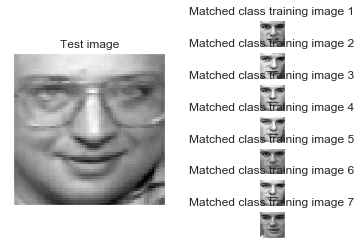

In [191]:
%matplotlib inline
X,y,pcadim = fetchDataset('olivetti') # fetch the olivetti data
xTr,yTr,xTe,yTe,trIdx,teIdx = trteSplitEven(X,y,0.7) # split into training and testing
pca = decomposition.PCA(n_components=20) # use PCA to reduce the dimension to 20
pca.fit(xTr) # use training data to fit the transform
xTrpca = pca.transform(xTr) # apply on training data
xTepca = pca.transform(xTe) # apply on test data
# use our pre-defined decision tree classifier together with the implemented
# boosting to classify data points in the training data
classifier = BoostClassifier(DecisionTreeClassifier(), T=10).trainClassifier(xTrpca, yTr)
yPr = classifier.classify(xTepca)
# choose a test point to visualize
testind = random.randint(0, xTe.shape[0]-1)
# visualize the test point together with the training points used to train
# the class that the test point was classified to belong to
visualizeOlivettiVectors(xTr[yTr == yPr[testind],:], xTe[testind,:])